In [31]:
import warnings             
warnings.filterwarnings(action='ignore')          # 경고 문구 무시
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"   # 셀 하나에 ouput 모두 출력 가능
import numpy as np                            
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#  한글글꼴로 변경
plt.rcParams['font.size'] = 12.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 표시 에러 
mpl.rcParams['axes.unicode_minus'] = False
import json
pd.options.display.max_rows= 10    # 화면에 최대 12개까지 결과 출력
np.random.seed(12345)

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime
from datetime import timedelta
pd.options.display.max_rows= 10    # 화면에 최대 12개까지 결과 출력
np.random.seed(12345) 

import matplotlib.ticker as ticker

#### 기관-외국인 매매량 그래프 생성

In [77]:
frgn_data = pd.read_csv('../data/frgn_invest_Top10.csv', index_col=[0], dtype={'코드':str},
                  names=['코드', '날짜', '종가','전일대비','증가율',
                           '거래량','기관매매량','외국매매량','외국보유수', '외국보유율'],
                  header=0)
frgn_data.head()

코드          날짜      종가 전일대비     증가율         거래량       기관매매량  \
0  005930  2021.06.21  79,900  600  -0.75%  15,992,571  -3,275,182   
1  005930  2021.06.18  80,500  400  -0.49%  14,916,721    +540,319   
2  005930  2021.06.17  80,900  900  -1.10%  14,007,385  -2,150,058   
3  005930  2021.06.16  81,800  900  +1.11%  14,999,855     -93,825   
4  005930  2021.06.15  80,900  400  +0.50%  10,075,685    -859,171   

        외국매매량          외국보유수   외국보유율  
0  -4,268,991  3,203,069,902  53.65%  
1  -5,587,396  3,207,338,893  53.73%  
2  -2,211,331  3,212,953,323  53.82%  
3  +2,800,637  3,214,255,737  53.84%  
4    +440,212  3,211,443,684  53.79%

In [78]:
frgn_data.loc[:,'종가':] = frgn_data.loc[:,'종가':].apply(lambda x:x.str.split(',').str.join('').str.replace('%', '').astype(str).astype(float))
frgn_data['날짜'] = pd.to_datetime(frgn_data['날짜'], format='%Y.%m.%d')
frgn_data.index = frgn_data.날짜
frgn_data['종가'] = frgn_data['종가'].astype(float)
frgn_data['전일대비'] = frgn_data['전일대비'].astype(float)
frgn_data['증가율'] = frgn_data['증가율'].astype(float)
frgn_data['거래량'] = frgn_data['거래량'].astype(float)
frgn_data['기관매매량'] = frgn_data['기관매매량'].astype(float)
frgn_data['외국매매량'] = frgn_data['외국매매량'].astype(float)

In [79]:
samsung = frgn_data[frgn_data.코드=='005930']
samsung

코드         날짜        종가     전일대비   증가율         거래량      기관매매량  \
날짜                                                                              
2021-06-21  005930 2021-06-21   79900.0    600.0 -0.75  15992571.0 -3275182.0   
2021-06-18  005930 2021-06-18   80500.0    400.0 -0.49  14916721.0   540319.0   
2021-06-17  005930 2021-06-17   80900.0    900.0 -1.10  14007385.0 -2150058.0   
2021-06-16  005930 2021-06-16   81800.0    900.0  1.11  14999855.0   -93825.0   
2021-06-15  005930 2021-06-15   80900.0    400.0  0.50  10075685.0  -859171.0   
...            ...        ...       ...      ...   ...         ...        ...   
2011-01-07  005930 2011-01-07  921000.0   9000.0 -0.97    463447.0   -38489.0   
2011-01-06  005930 2011-01-06  930000.0  12000.0 -1.27    387488.0     1831.0   
2011-01-05  005930 2011-01-05  942000.0  16000.0 -1.67    336224.0   -64630.0   
2011-01-04  005930 2011-01-04  958000.0      0.0  0.00    274488.0   -57856.0   
2011-01-03  005930 2011-01-03  958000.0   9000.0  0.95    265562.0      248.0   

                외국매매량         외국보유수  외국보유율  
날짜                                          
2021-06-21 -4268991.0  3203069902.0  53.65  
2021-06-18 -5587396.0  3207338893.0  53.73  
2021-06-17 -2211331.0  3212953323.0  53.82  
2021-06-16  2800637.0  3214255737.0  53.84  
2021-06-15   440212.0  3211443684.0  53.79  
...               ...           ...    ...  
2011-01-07   -78771.0    74454787.0  50.55  
2011-01-06   -70275.0    74533885.0   50.6  
2011-01-05    42863.0    74606835.0  50.65  
2011-01-04    59571.0    74573037.0  50.63  
2011-01-03    16572.0    74518914.0  50.59  

[2579 rows x 10 columns]

In [80]:
samsung_2020 = samsung[::-1]['2020.01.01':'2020.12.31']
samsung_2020.tail(2)

코드         날짜       종가    전일대비   증가율         거래량      기관매매량  \
날짜                                                                            
2020-12-29  005930 2020-12-29  78300.0   400.0 -0.51  30339449.0 -6166523.0   
2020-12-30  005930 2020-12-30  81000.0  2700.0  3.45  29417421.0  1204866.0   

                외국매매량         외국보유수  외국보유율  
날짜                                          
2020-12-29 -3186568.0  3327108382.0  55.73  
2020-12-30  -332172.0  3326606260.0  55.72

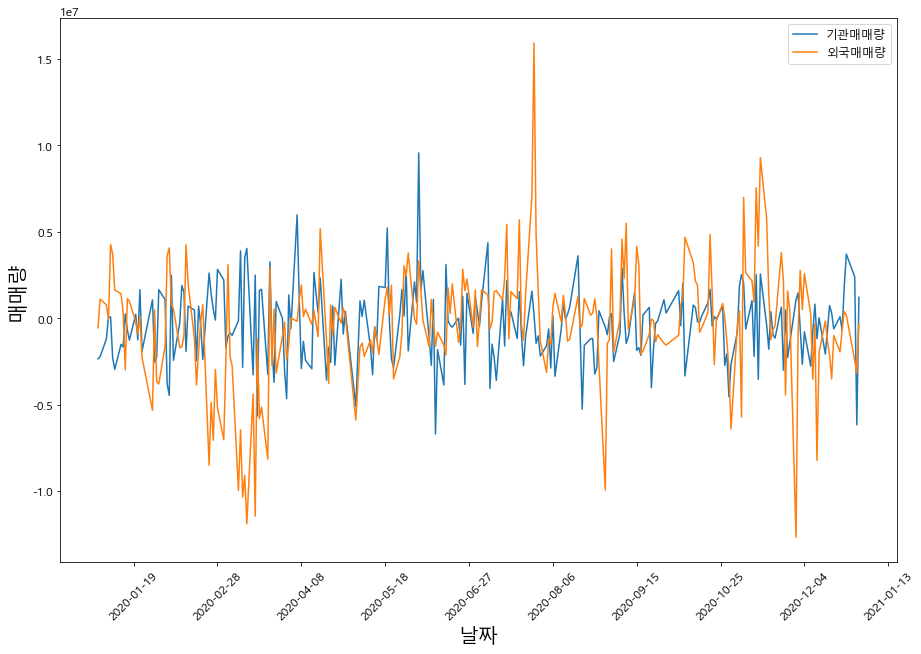

In [81]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.plot(samsung_2020.날짜, samsung_2020.기관매매량)
ax.plot(samsung_2020.날짜, samsung_2020.외국매매량)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MaxNLocator(12))
plt.xlabel('날짜', fontsize=20)
plt.ylabel('매매량', fontsize=20)
ax.legend(['기관매매량', '외국매매량'])
plt.show();

In [82]:
samsung_2020_mean = samsung_2020.groupby(samsung_2020.날짜.dt.strftime('%Y-%m'))[['기관매매량', '외국매매량']].sum()
samsung_2020_mean

기관매매량       외국매매량
날짜                             
2020-01 -19177280.0  -3840699.0
2020-02  -2051994.0 -25619296.0
2020-03  -4570049.0 -98987386.0
2020-04  -9234809.0   -417911.0
2020-05  -3327140.0 -10694533.0
...             ...         ...
2020-08 -19761653.0 -14514656.0
2020-09 -11678748.0   8983084.0
2020-10  -8261128.0   5504530.0
2020-11  -3147087.0  23693732.0
2020-12  -6496675.0 -24976384.0

[12 rows x 2 columns]

In [83]:
samsung_2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2020-01-02 to 2020-12-30
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   코드      248 non-null    object        
 1   날짜      248 non-null    datetime64[ns]
 2   종가      248 non-null    float64       
 3   전일대비    248 non-null    float64       
 4   증가율     248 non-null    float64       
 5   거래량     248 non-null    float64       
 6   기관매매량   248 non-null    float64       
 7   외국매매량   248 non-null    float64       
 8   외국보유수   248 non-null    object        
 9   외국보유율   248 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 21.3+ KB


In [88]:
samsung_2020.head()

코드         날짜       종가    전일대비   증가율         거래량      기관매매량  \
날짜                                                                            
2020-01-02  005930 2020-01-02  55200.0   600.0 -1.08  12993228.0 -2354766.0   
2020-01-03  005930 2020-01-03  55500.0   300.0  0.54  15422255.0 -2228329.0   
2020-01-06  005930 2020-01-06  55500.0     0.0  0.00  10278951.0 -1199654.0   
2020-01-07  005930 2020-01-07  55800.0   300.0  0.54  10009778.0    51896.0   
2020-01-08  005930 2020-01-08  56800.0  1000.0  1.79  23501171.0    73413.0   

                외국매매량         외국보유수  외국보유율  
날짜                                          
2020-01-02  -555181.0  3392458522.0  56.83  
2020-01-03  1110317.0  3394101839.0  56.85  
2020-01-06   771595.0  3395947207.0  56.89  
2020-01-07   -58613.0  3396603861.0   56.9  
2020-01-08  4272673.0  3401953233.0  56.99

#### 일주일 단위로 묶어서 평균

In [157]:
fill_mean_func = lambda g: g.fillna(g.mean())

def draw_chart(data, target, year, start, end):
    data_year = data[::-1][start:end]
    data_year_week_mean = data_year.resample('W-Mon')[['기관매매량', '외국매매량','거래량']].agg('mean').apply(fill_mean_func)
    print(data_year_week_mean)
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    ax.plot(data_year_week_mean.index, data_year_week_mean.기관매매량, 'o--', lw=2.5)
    ax.plot(data_year_week_mean.index, data_year_week_mean.외국매매량, 'o--', lw=2.5)
    ax.plot(data_year_week_mean.index, data_year_week_mean.거래량, 'o--', lw=2.5)
    plt.xticks(rotation=45)
    # ax.xaxis.set_major_locator(ticker.MaxNLocator(20))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
    plt.xlabel('날짜', fontsize=20)
    plt.ylabel('매매량', fontsize=20)
    plt.yscale('linear')
    # plt.ylim(samsung_2020_week_mean.기관매매량.min(), samsung_2020_week_mean.기관매매량.max())
    plt.title(f'{target}_{year}년 기관-외국인 매매량 비교', fontsize=30)
    # plt.ylim(samsung_2020_mean2)
    ax.legend(['기관매매량', '외국매매량', '총 거래량'])
    ax.grid()
    plt.savefig(f'figures/{target}_{year}년_매매량 그래프.png')
    plt.show();

                   기관매매량    외국매매량       거래량
날짜                                         
2011-01-03    248.000000  16572.0  265562.0
2011-01-10 -29676.600000 -25596.8  365750.8
2011-01-17 -10068.800000  21622.0  418173.2
2011-01-24  58154.200000  -5924.4  434472.4
2011-01-31   8593.000000   -805.6  333214.2
...                  ...      ...       ...
2011-12-05  85143.000000  30530.4  475688.6
2011-12-12  82127.600000 -65781.2  345838.4
2011-12-19  20400.200000 -66992.2  336541.4
2011-12-26  41051.200000   5962.0  253590.0
2012-01-02  -2661.333333  15109.0  222004.0

[53 rows x 3 columns]


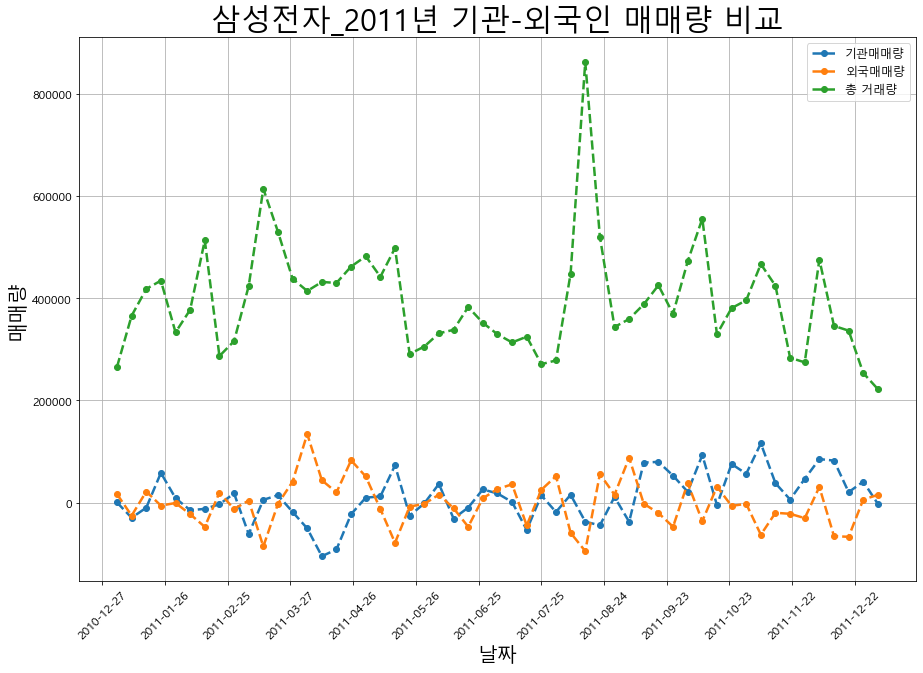

               기관매매량          외국매매량        거래량
날짜                                            
2012-01-02  89690.00  -58119.000000  263300.00
2012-01-09  13143.60  -60476.200000  358409.00
2012-01-16  19632.60  -38141.000000  337942.40
2012-01-23 -23253.75  135449.500000  402648.25
2012-01-30 -22286.50   77079.250000  347854.00
...              ...            ...        ...
2012-12-03  19521.40  -25628.800000  262789.60
2012-12-10 -31066.80   51304.000000  260653.20
2012-12-17  -1793.40   17005.600000  352393.00
2012-12-24    303.25   -5973.250000  379549.75
2012-12-31  14194.00    9085.333333  225665.00

[53 rows x 3 columns]


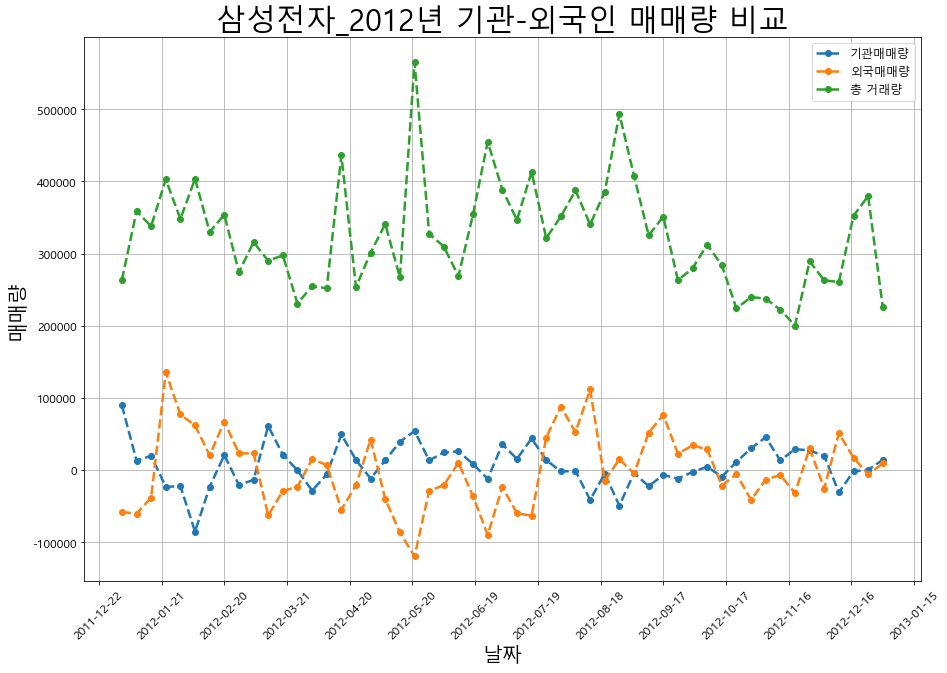

              기관매매량     외국매매량        거래량
날짜                                      
2013-01-07 -15658.5  -4275.50  256689.25
2013-01-14 -14900.4   4513.00  244708.60
2013-01-21 -18206.0 -35138.60  297242.20
2013-01-28  16534.2 -81065.00  360237.40
2013-02-04  -5902.6  30356.20  313277.00
...             ...       ...        ...
2013-12-02   5686.8  24018.40  171291.40
2013-12-09 -15463.2  -2416.20  181066.40
2013-12-16   3453.2 -35404.80  209417.80
2013-12-23  11543.2  21924.00  193042.40
2013-12-30 -12540.5  18467.75  253531.25

[52 rows x 3 columns]


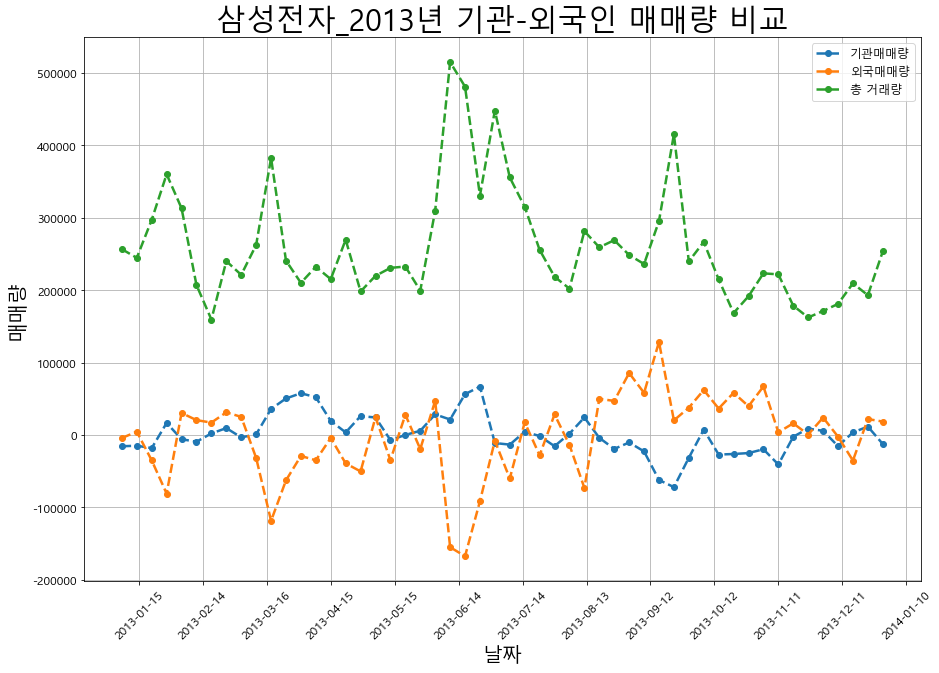

                   기관매매량         외국매매량            거래량
날짜                                                   
2014-01-06 -24444.666667 -92227.666667  515049.333333
2014-01-13 -51460.400000  31300.000000  384509.200000
2014-01-20   4027.400000   7987.000000  230694.400000
2014-01-27  -9120.400000  13143.400000  224295.200000
2014-02-03  10373.333333 -31355.000000  314282.666667
...                  ...           ...            ...
2014-12-08   5699.800000  10648.600000  165535.600000
2014-12-15  46560.200000 -81161.000000  315027.800000
2014-12-22  39495.400000 -64510.400000  296368.000000
2014-12-29   6635.250000  -4576.750000  191794.500000
2015-01-05 -61021.000000 -21969.000000  212982.000000

[53 rows x 3 columns]


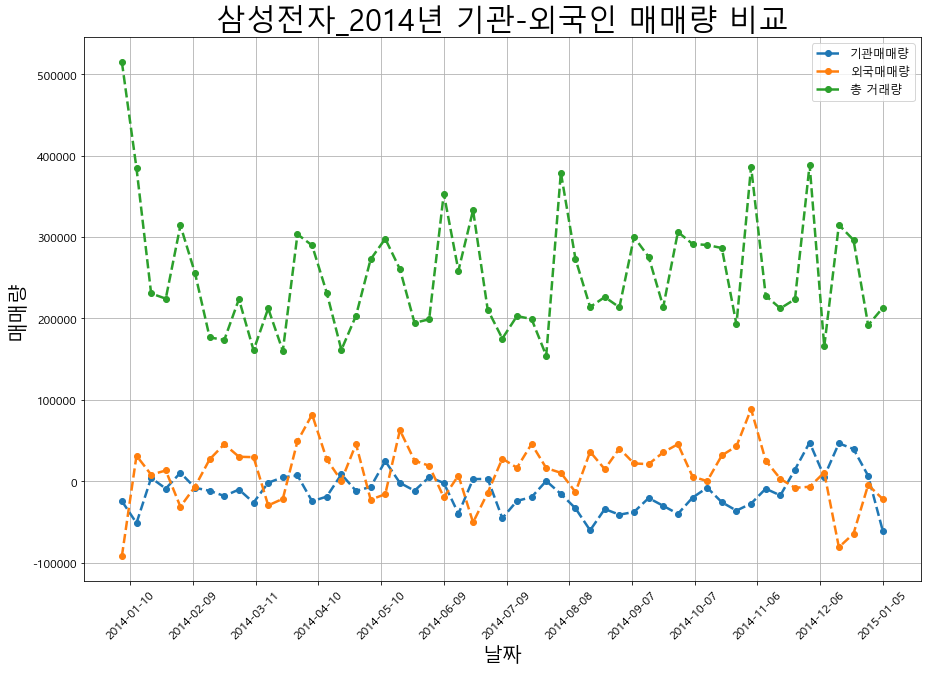

               기관매매량    외국매매량        거래량
날짜                                      
2015-01-05  -5592.00 -16075.5  189144.50
2015-01-12  10966.20 -44044.0  246694.60
2015-01-19   1049.20 -29152.8  243884.00
2015-01-26  27615.60 -35788.6  283442.60
2015-02-02  20150.80 -13177.4  244487.80
...              ...      ...        ...
2015-12-07 -10522.40 -49586.4  207450.80
2015-12-14  25542.20 -72956.0  210706.20
2015-12-21  25657.00 -50343.0  177393.60
2015-12-28  28967.25 -25606.5  199180.25
2016-01-04 -41528.50 -22307.5  218451.00

[53 rows x 3 columns]


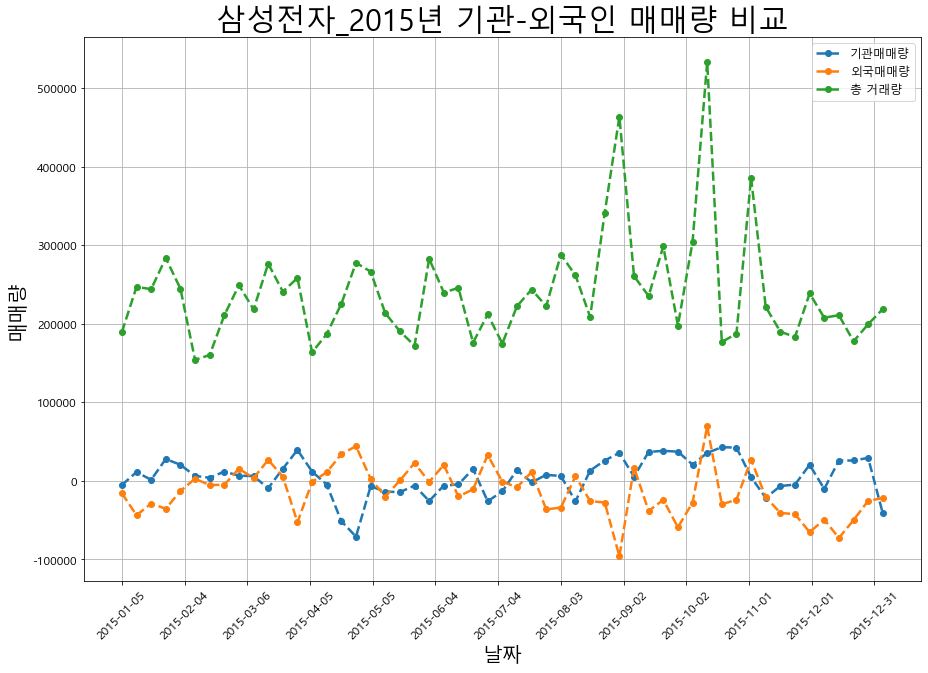

              기관매매량         외국매매량       거래량
날짜                                         
2016-01-04 -56273.0 -61874.000000  306939.0
2016-01-11  -1450.4 -53678.800000  272836.4
2016-01-18   9236.4 -27033.600000  217659.8
2016-01-25  22206.2 -19233.000000  174417.4
2016-02-01 -24019.6   2381.400000  288302.0
...             ...           ...       ...
2016-12-05 -34980.6  51430.600000  343957.6
2016-12-12  17189.4 -10447.200000  248539.6
2016-12-19  -7715.8  12460.600000  168386.4
2016-12-26  13490.4  -5622.200000  134721.4
2017-01-02 -27324.0  17886.666667  125552.0

[53 rows x 3 columns]


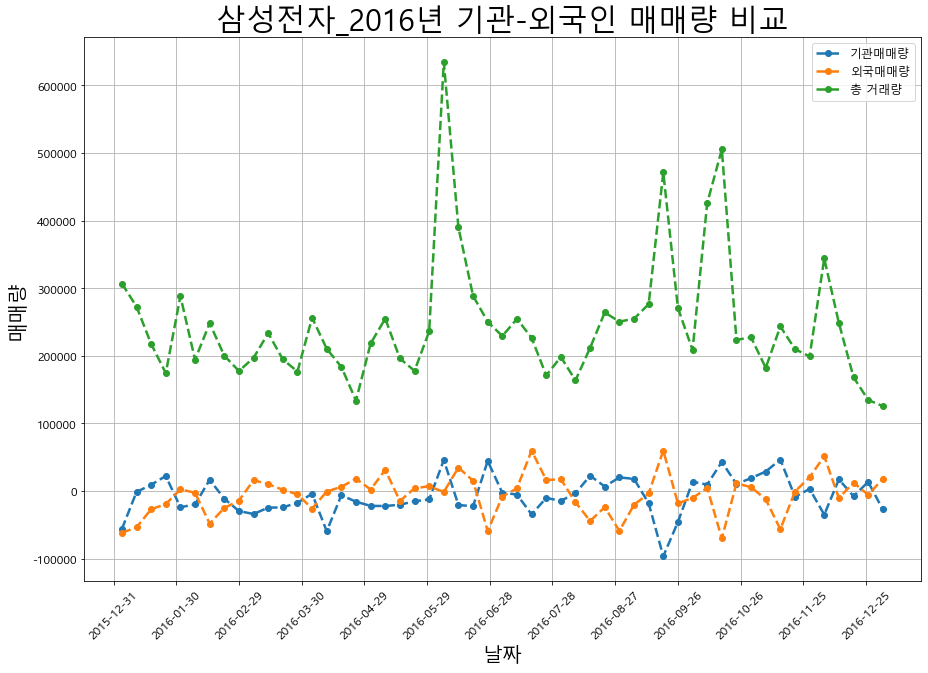

                   기관매매량         외국매매량            거래량
날짜                                                   
2017-01-02 -13221.000000    712.000000   93012.000000
2017-01-09 -28564.000000  17178.200000  193490.800000
2017-01-16  26329.000000 -42063.400000  261412.200000
2017-01-23   2969.200000 -11532.800000  177761.600000
2017-01-30 -13967.000000  12198.666667  264647.333333
...                  ...           ...            ...
2017-12-04  13235.200000 -60547.600000  321829.800000
2017-12-11  21917.400000 -32078.400000  202790.600000
2017-12-18   7988.600000 -17803.200000  250751.800000
2017-12-25  46116.750000 -29148.750000  244415.500000
2018-01-01  21203.333333  -7185.333333  238459.333333

[53 rows x 3 columns]


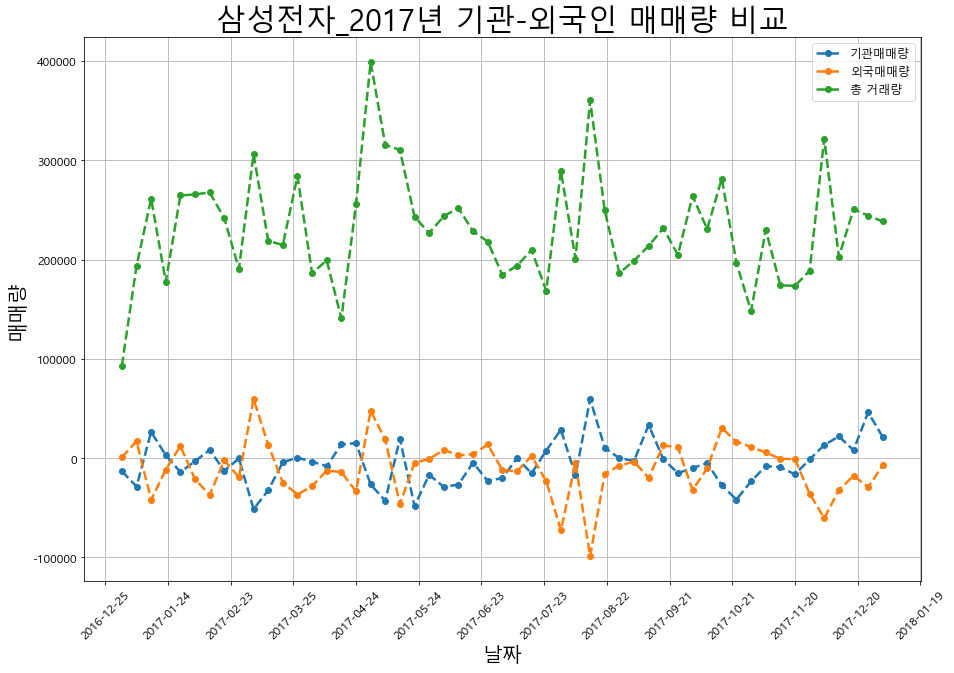

                   기관매매량      외국매매량           거래량
날짜                                               
2018-01-08 -2.457540e+04    14598.6  1.921920e+05
2018-01-15 -4.035200e+03   -89598.6  3.962826e+05
2018-01-22 -7.445600e+03    -3562.8  2.721296e+05
2018-01-29  1.774120e+04     5885.2  2.257298e+05
2018-02-05 -3.384320e+04  -135758.2  6.487742e+05
...                  ...        ...           ...
2018-12-03 -6.064602e+05   536137.2  1.113398e+07
2018-12-10  2.659776e+05 -2941143.8  1.351138e+07
2018-12-17 -8.312946e+05   119407.8  1.602449e+07
2018-12-24  1.438124e+06  -706281.4  1.151967e+07
2018-12-31 -1.420253e+06  1794445.0  1.103953e+07

[52 rows x 3 columns]


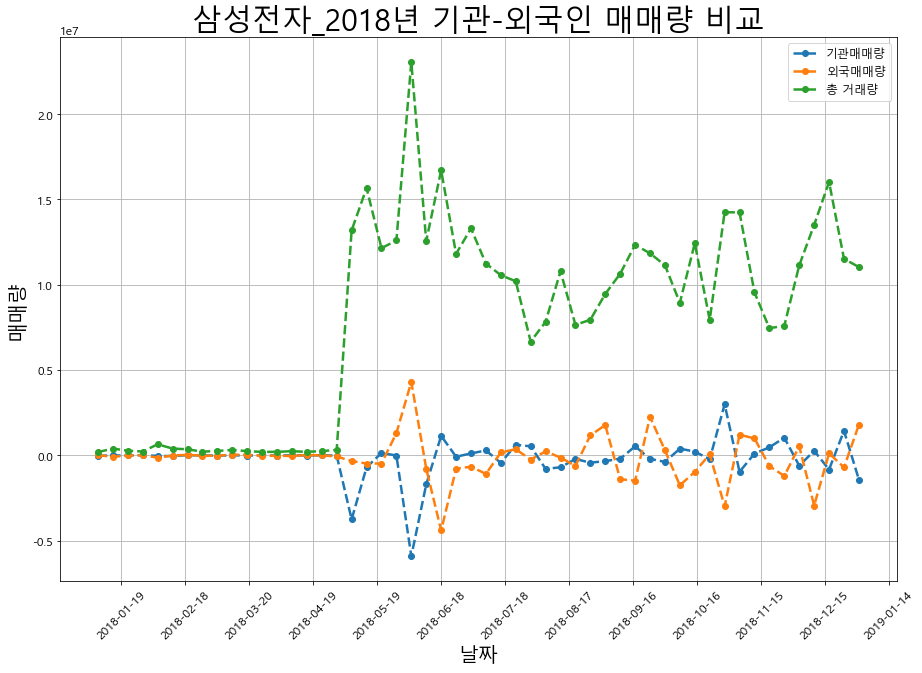

                 기관매매량       외국매매량         거래량
날짜                                            
2019-01-07  -442695.25   435763.50  11794278.0
2019-01-14  -767091.40  1856448.20  13717404.0
2019-01-21   -91553.60  1795047.00  10821242.2
2019-01-28 -1231941.40  3919672.20  15314273.4
2019-02-04 -1795304.00  4246973.75  17293649.0
...                ...         ...         ...
2019-12-02  2085414.60 -3069729.20  14361791.6
2019-12-09   567888.40 -1076575.60  11128253.2
2019-12-16  1558932.20  2270085.00  15414731.0
2019-12-23  -426796.20  1941003.00  14206386.4
2019-12-30  1701600.25 -1600377.75  10545830.0

[52 rows x 3 columns]


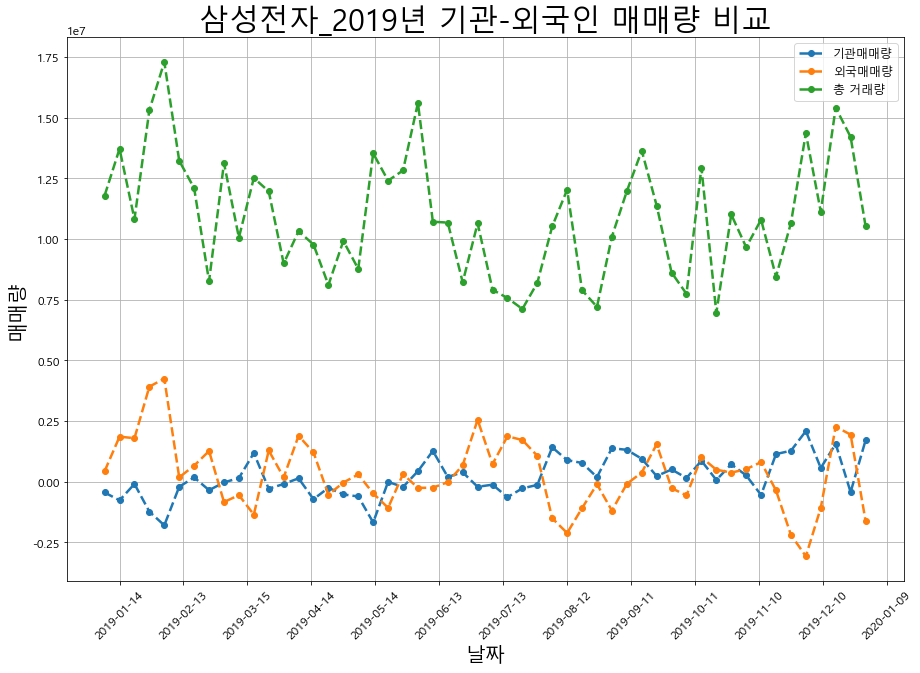

                   기관매매량         외국매매량           거래량
날짜                                                  
2020-01-06 -1.927583e+06  4.422437e+05  1.289814e+07
2020-01-13 -1.328936e+06  2.189441e+06  1.699457e+07
2020-01-20 -6.286874e+05 -1.498404e+05  1.482870e+07
2020-01-27 -5.041243e+05 -1.014692e+06  1.379960e+07
2020-02-03 -2.034180e+05 -2.786197e+06  2.093546e+07
...                  ...           ...           ...
2020-12-07 -1.064114e+06  1.055920e+06  2.646603e+07
2020-12-14 -6.485314e+05 -2.849272e+06  2.579167e+07
2020-12-21 -4.176440e+04 -1.986400e+06  2.012987e+07
2020-12-28  1.809258e+06 -6.397202e+05  2.707604e+07
2021-01-04 -2.480828e+06 -1.759370e+06  2.987844e+07

[53 rows x 3 columns]


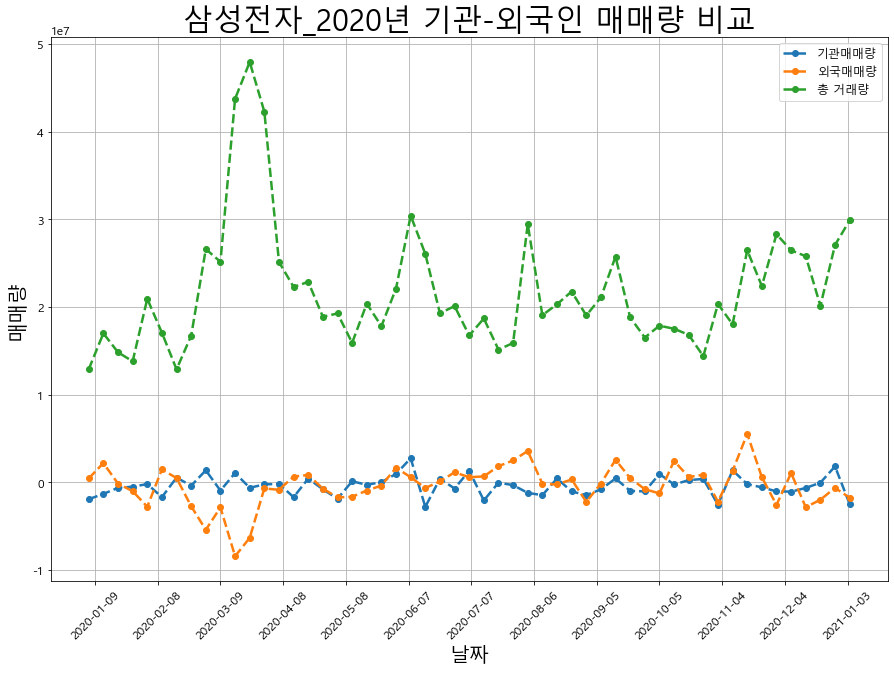

                 기관매매량       외국매매량          거래량
날짜                                             
2021-01-04 -3986032.00 -4627298.00  38655276.00
2021-01-11 -4697588.60 -2616763.40  51877761.60
2021-01-18 -3608014.80 -1269292.80  37560998.80
2021-01-25 -1419018.20  -800522.00  29708875.40
2021-02-01 -2666521.20 -5299429.00  31824924.80
...                ...         ...          ...
2021-05-24   610352.75 -2126938.25  17099153.75
2021-05-31   363188.20  -140293.60  14898666.80
2021-06-07   534094.20  1277289.60  18925501.60
2021-06-14 -1793021.60  -416360.80  13983016.80
2021-06-21 -1167583.40 -1765373.80  13998443.40

[25 rows x 3 columns]


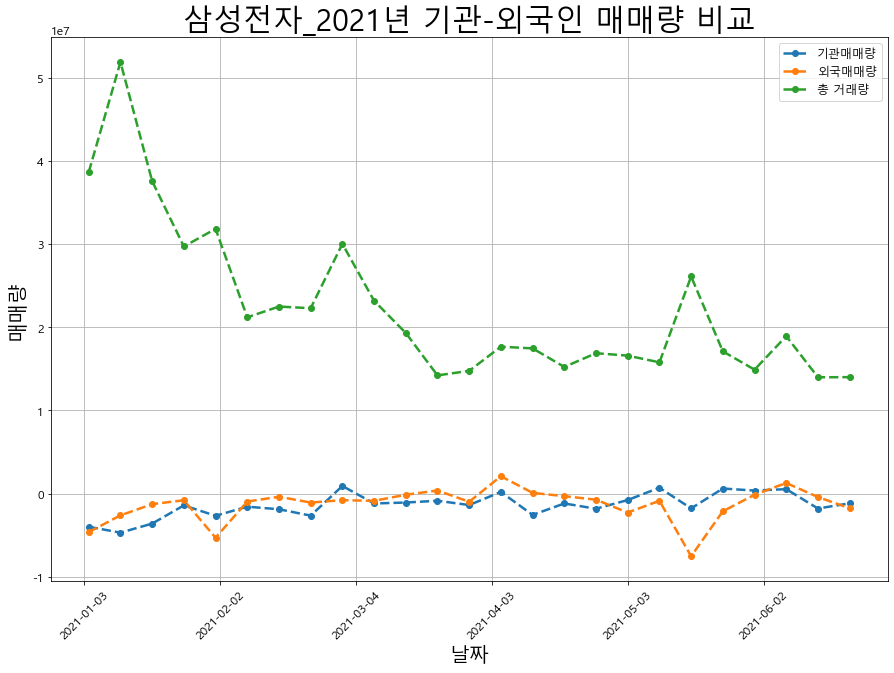

In [158]:
    
for year in range(2011,2022,1):
    start = f'{year}.01.01'
    end = f'{year}.12.31'
    draw_chart(samsung, '삼성전자', year,start, end )

코드         날짜        종가    전일대비   증가율         거래량      기관매매량  \
날짜                                                                             
2021-06-21  000660 2021-06-21  122000.0  2500.0 -2.01   3238839.0  -595651.0   
2021-06-18  000660 2021-06-18  124500.0  2000.0 -1.58   2506112.0  -175607.0   
2021-06-17  000660 2021-06-17  126500.0  3000.0 -2.32   2123793.0  -417179.0   
2021-06-16  000660 2021-06-16  129500.0  1000.0  0.78   1893752.0   122857.0   
2021-06-15  000660 2021-06-15  128500.0  1500.0  1.18   1975082.0   191681.0   
...            ...        ...       ...     ...   ...         ...        ...   
2011-01-07  000660 2011-01-07   26100.0     0.0  0.00   7024336.0    56946.0   
2011-01-06  000660 2011-01-06   26100.0   200.0  0.77  14287171.0  1209792.0   
2011-01-05  000660 2011-01-05   25900.0   300.0  1.17  14139328.0  1283396.0   
2011-01-04  000660 2011-01-04   25600.0   300.0  1.19  10931161.0  2091451.0   
2011-01-03  000660 2011-01-03   25300.0  1300.0  5.42  15107759.0  5552050.0   

                외국매매량        외국보유수  외국보유율  
날짜                                         
2021-06-21  -762034.0  359261828.0  49.35  
2021-06-18  -856643.0  360023862.0  49.45  
2021-06-17  -381533.0  360918505.0  49.58  
2021-06-16   309535.0  361177267.0  49.61  
2021-06-15   295532.0  360819732.0  49.56  
...               ...          ...    ...  
2011-01-07   840080.0  107335545.0  18.18  
2011-01-06  2210272.0  105823977.0  17.93  
2011-01-05  2555866.0  103232405.0  17.49  
2011-01-04  1144198.0  100888782.0  17.09  
2011-01-03  -253800.0   99448818.0  16.85  

[2579 rows x 10 columns]

                기관매매량         외국매매량         거래량
날짜                                             
2011-01-03  5552050.0 -2.538000e+05  15107759.0
2011-01-10   846509.0  1.280088e+06  11196782.8
2011-01-17   104328.0  1.415694e+06  11461936.8
2011-01-24    39406.2  1.565584e+06   9375886.2
2011-01-31    -3436.0  1.495616e+06  11401682.2
...               ...           ...         ...
2011-12-05   161315.4  3.162284e+05   7155546.8
2011-12-12  -658470.2 -3.478964e+05   6467860.6
2011-12-19   553124.4  1.501800e+03   7777224.0
2011-12-26  -247815.8  3.342290e+05   4926762.4
2012-01-02   477509.0  2.325953e+05   3893802.0

[53 rows x 3 columns]


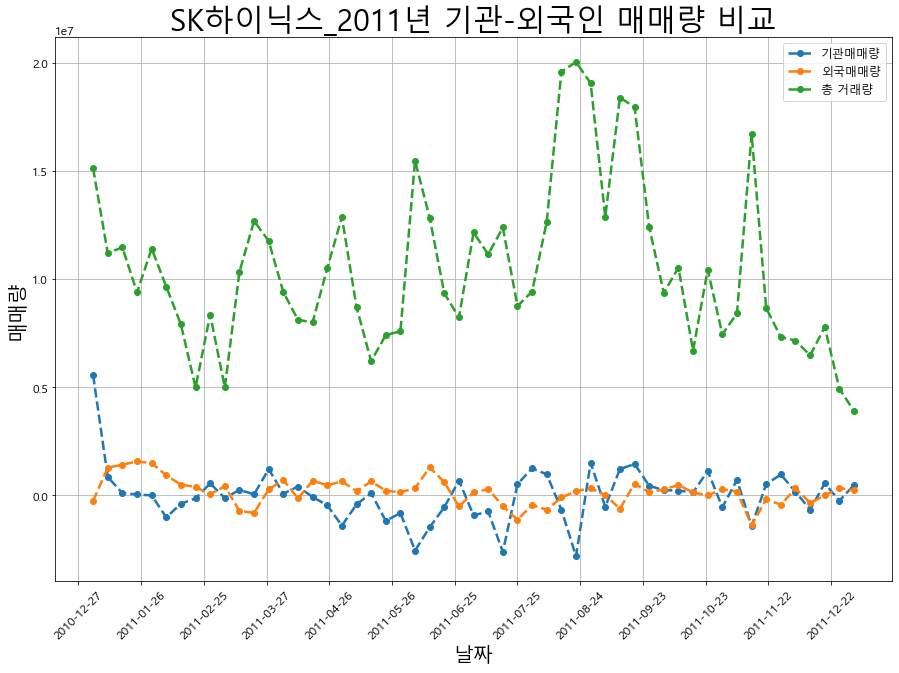

                 기관매매량      외국매매량           거래량
날짜                                             
2012-01-02  4063345.00   553310.0  1.217015e+07
2012-01-09   909168.80  1136040.0  7.131280e+06
2012-01-16    61085.20   660627.2  5.448947e+06
2012-01-23  -555918.50  2169068.5  7.115374e+06
2012-01-30 -1171738.50   547113.5  9.441626e+06
...                ...        ...           ...
2012-12-03  -421236.40  -127161.2  4.812926e+06
2012-12-10   574856.00   108785.2  4.249981e+06
2012-12-17   178604.00   264532.6  5.117379e+06
2012-12-24  -298030.75    90153.0  5.367279e+06
2012-12-31   -27464.00    31077.0  2.608662e+06

[53 rows x 3 columns]


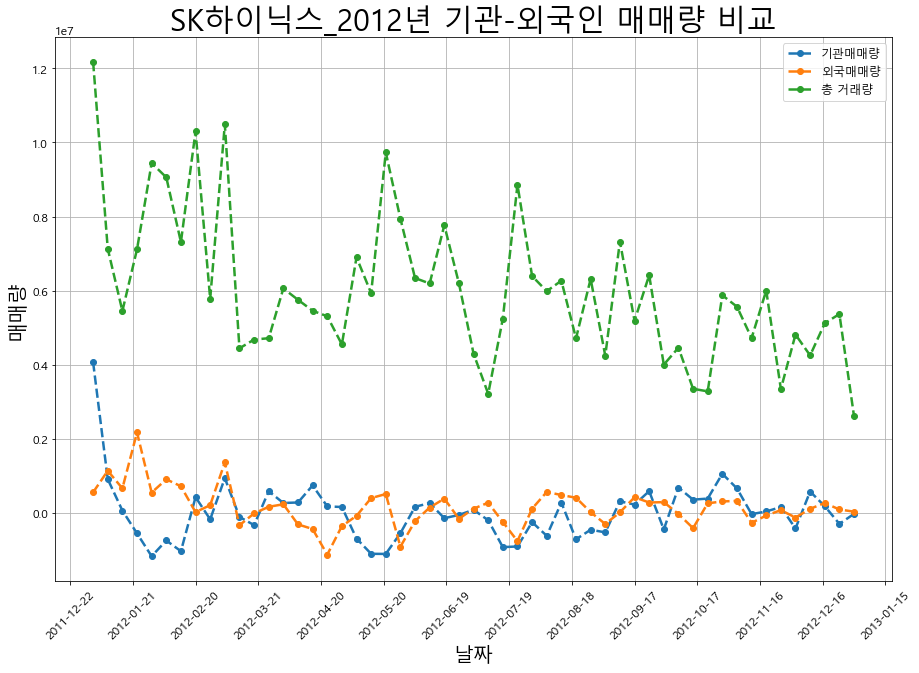

                기관매매량      외국매매량         거래량
날짜                                          
2013-01-07 -351840.75   560533.0  4719689.75
2013-01-14  216512.60   291005.4  4029661.60
2013-01-21 -903895.40   258951.4  5212431.80
2013-01-28 -307139.40  -952908.0  5474702.00
2013-02-04 -335164.40    61573.8  4200129.80
...               ...        ...         ...
2013-12-02  174775.80  1708414.0  4810610.00
2013-12-09   39801.20   382890.6  4360572.80
2013-12-16 -367422.00   758954.4  3890876.40
2013-12-23 -332102.20   407169.8  4945141.60
2013-12-30  173405.50    83134.5  2784072.75

[52 rows x 3 columns]


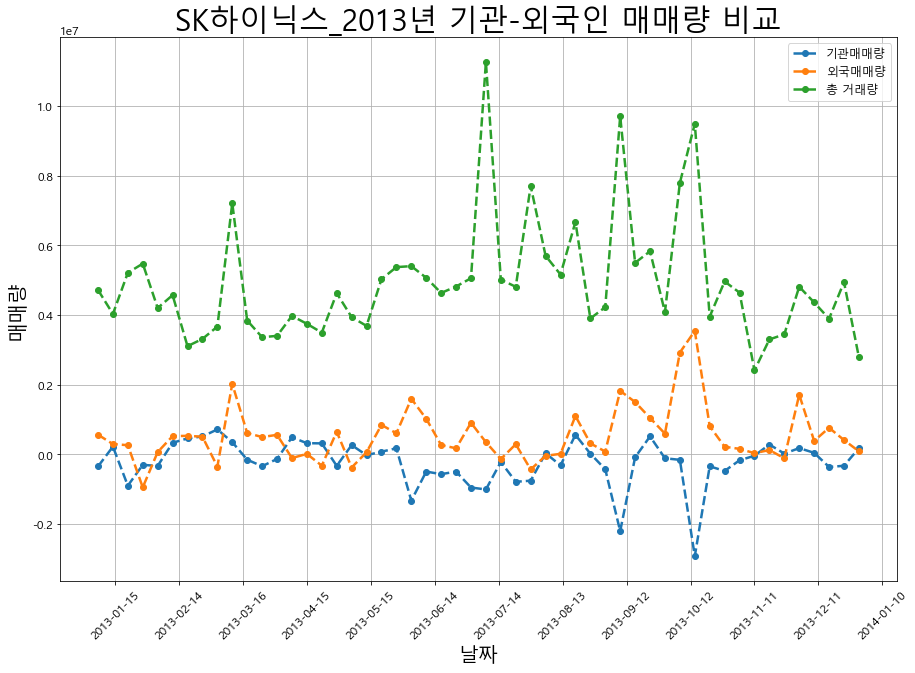

                    기관매매량      외국매매량           거래량
날짜                                                
2014-01-06  206799.333333  309112.00  4.619872e+06
2014-01-13 -308517.800000  661540.60  4.240028e+06
2014-01-20 -985531.600000   19779.20  5.034581e+06
2014-01-27 -276915.800000  -69286.40  5.048785e+06
2014-02-03  260164.000000  988241.00  4.720532e+06
...                   ...        ...           ...
2014-12-08  -35581.000000  259430.20  1.526751e+06
2014-12-15  -18834.000000  -34677.00  1.970599e+06
2014-12-22   74355.000000   79283.60  1.750403e+06
2014-12-29   28832.500000   70809.25  1.309191e+06
2015-01-05   20081.000000  -72671.00  1.159390e+06

[53 rows x 3 columns]


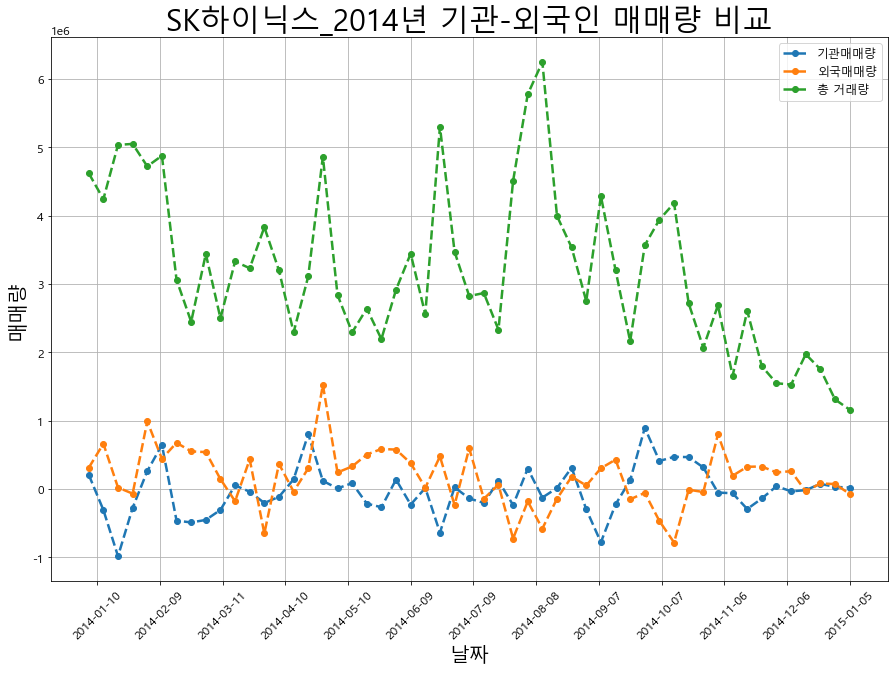

               기관매매량       외국매매량        거래량
날짜                                         
2015-01-05 -317334.5    86558.50  1282545.0
2015-01-12   24568.4   433494.00  2702612.6
2015-01-19   12635.6  -792487.00  2951863.0
2015-01-26  -13711.8   -30670.20  2051408.4
2015-02-02 -499926.0   -25901.00  3129514.2
...              ...         ...        ...
2015-12-07  -51222.4  -406250.00  2515733.8
2015-12-14 -172217.8  -205584.40  2709713.2
2015-12-21  159965.0    67403.20  2249886.6
2015-12-28 -126319.5  1476059.25  4588030.5
2016-01-04 -295855.0   145382.00  1883487.0

[53 rows x 3 columns]


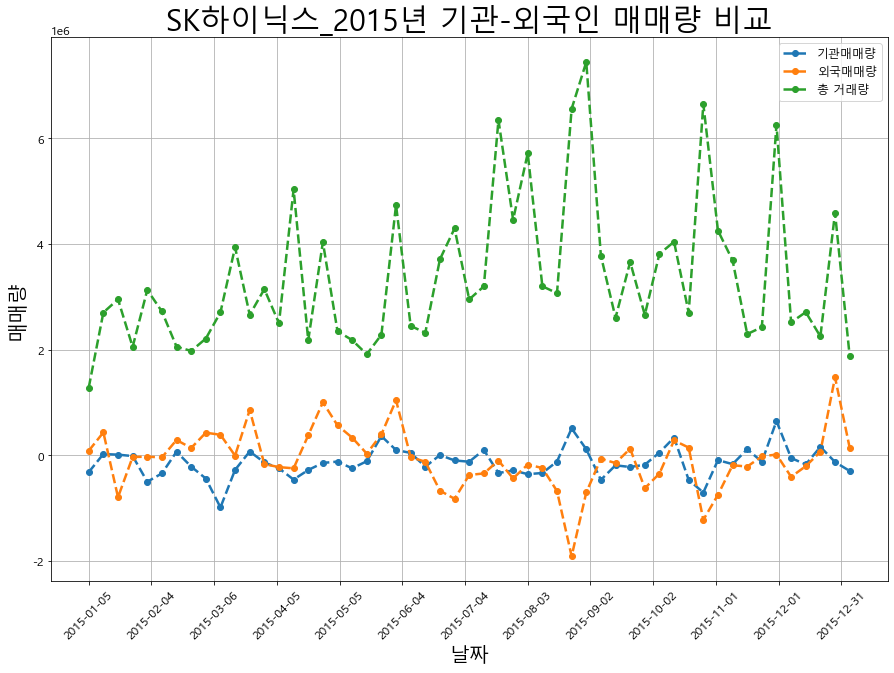

                    기관매매량          외국매매량           거래량
날짜                                                    
2016-01-04 -417711.000000  173460.000000  1.878039e+06
2016-01-11 -340380.000000 -327083.200000  3.338944e+06
2016-01-18 -247150.000000 -426636.800000  4.189723e+06
2016-01-25  190403.800000   -8761.800000  3.331559e+06
2016-02-01    3617.800000   24769.400000  3.851946e+06
...                   ...            ...           ...
2016-12-05  353164.800000  -27659.400000  3.108304e+06
2016-12-12  275433.800000   16498.600000  2.568101e+06
2016-12-19  -72433.600000  -79566.400000  1.952101e+06
2016-12-26  116012.800000   46811.800000  2.280786e+06
2017-01-02 -111706.666667  -94948.333333  1.426910e+06

[53 rows x 3 columns]


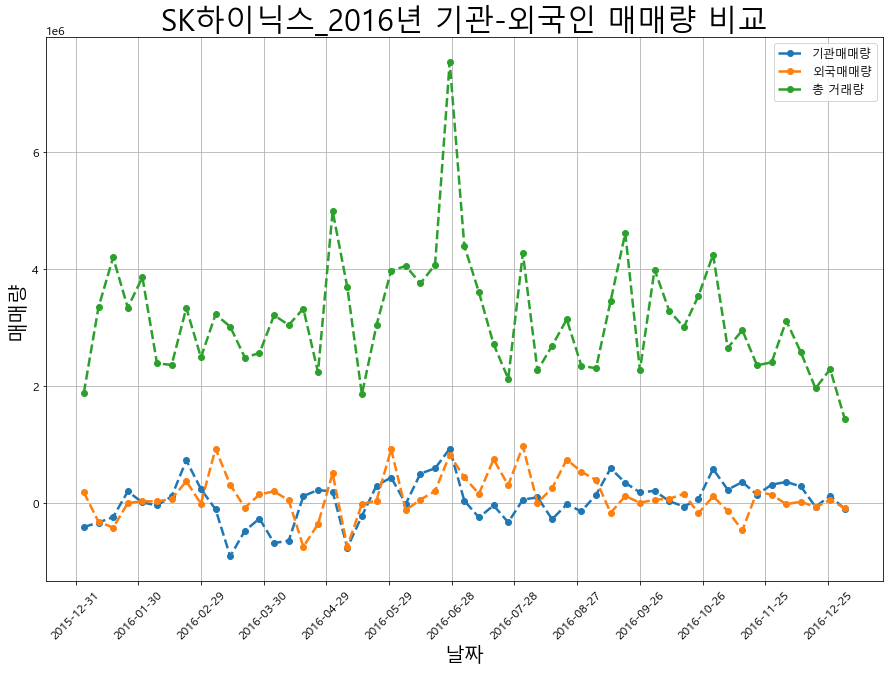

                    기관매매량          외국매매량           거래량
날짜                                                    
2017-01-02  216083.000000   39387.000000  1.547681e+06
2017-01-09   68407.200000  -60397.000000  2.958816e+06
2017-01-16   79148.000000 -705698.800000  4.235469e+06
2017-01-23  144634.600000 -141744.200000  2.741634e+06
2017-01-30  332541.666667  342809.666667  3.560684e+06
...                   ...            ...           ...
2017-12-04 -352515.000000 -416333.000000  5.234397e+06
2017-12-11  322830.200000 -317539.400000  3.798167e+06
2017-12-18 -111489.800000 -282988.600000  3.879480e+06
2017-12-25  464880.250000  110495.750000  4.843021e+06
2018-01-01    4369.333333 -170502.666667  4.457125e+06

[53 rows x 3 columns]


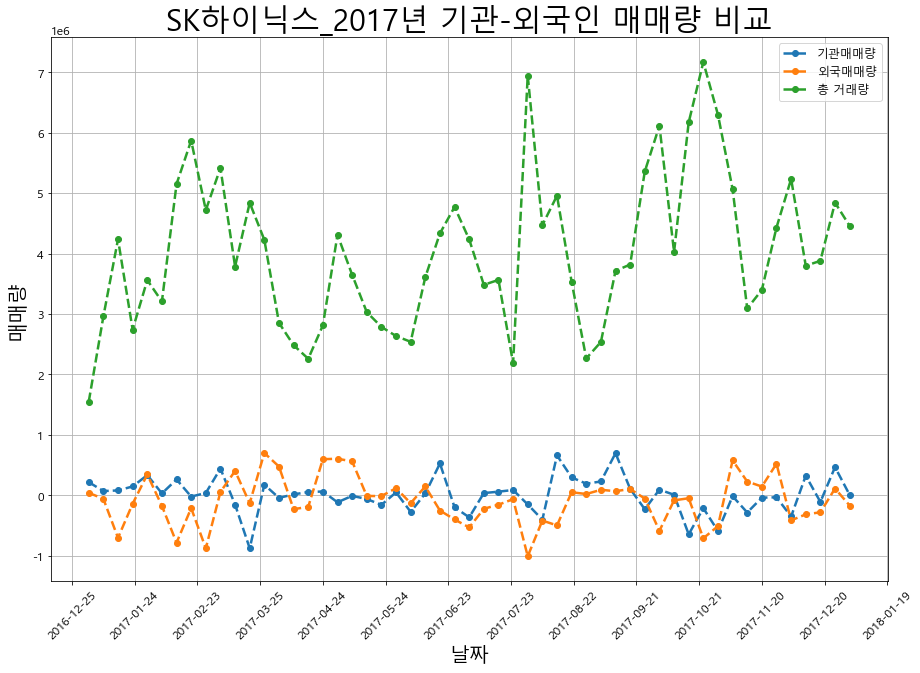

               기관매매량          외국매매량        거래량
날짜                                            
2018-01-08   64012.0  308601.000000  3039474.0
2018-01-15 -732000.8 -462604.200000  5089199.2
2018-01-22 -234787.0   27045.000000  4669702.6
2018-01-29   85833.4  346028.200000  5029563.4
2018-02-05 -466053.0   26540.400000  4526707.6
...              ...            ...        ...
2018-12-03 -283114.8  231120.800000  2986635.4
2018-12-10 -315742.6  -27745.000000  2986020.4
2018-12-17  -53758.4 -319283.200000  3509098.4
2018-12-24  155768.0  -22821.600000  3519679.0
2018-12-31  -25649.0  324356.333333  2383440.0

[52 rows x 3 columns]


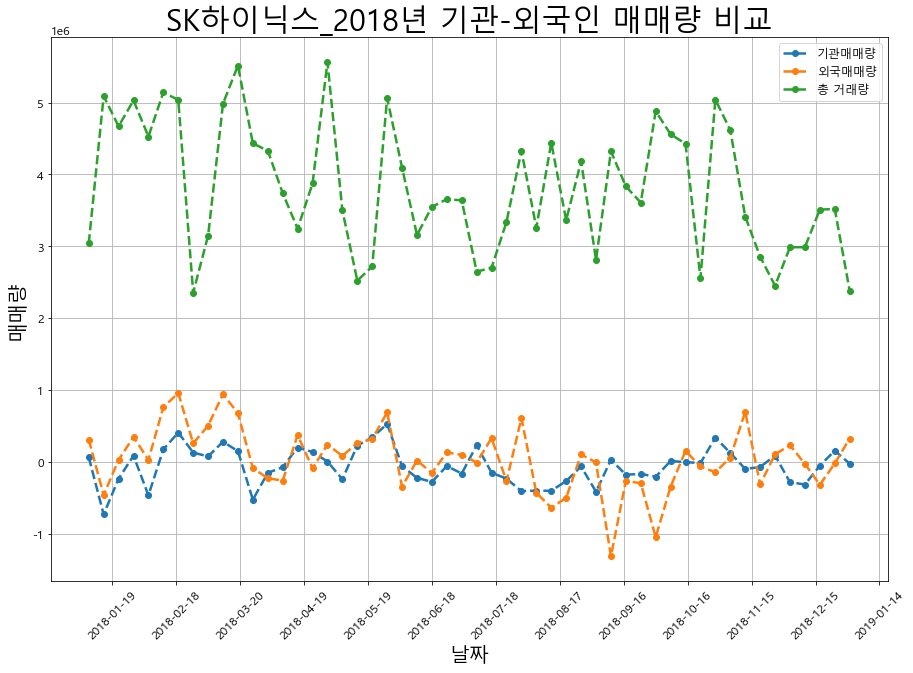

                기관매매량       외국매매량         거래량
날짜                                           
2019-01-07   49635.50    -3739.75  2733438.25
2019-01-14   11832.60   602120.40  4039762.20
2019-01-21   56823.20   274971.80  2792702.20
2019-01-28 -240246.40  1235905.60  5184617.20
2019-02-04 -116028.25   686325.00  4117745.75
...               ...         ...         ...
2019-12-02  358626.60  -420808.60  2269425.00
2019-12-09  335813.00  -509828.20  5366670.00
2019-12-16  281396.40   681053.20  3514648.00
2019-12-23 -290646.40   804365.00  3590951.60
2019-12-30  217550.75  -174703.00  1779009.00

[52 rows x 3 columns]


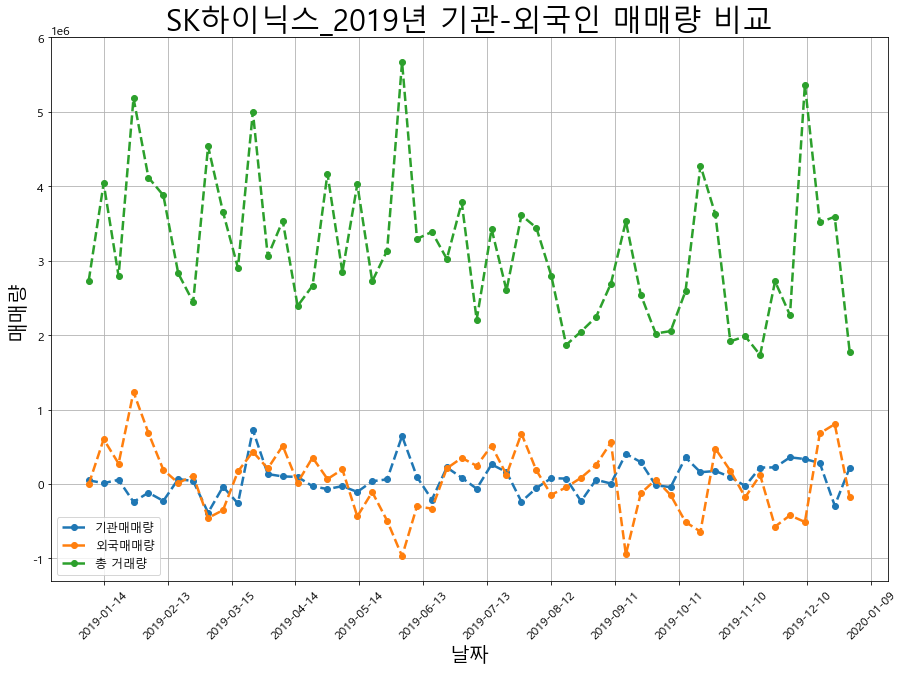

                    기관매매량          외국매매량           거래량
날짜                                                    
2020-01-06 -288314.000000  173140.666667  2.647008e+06
2020-01-13  155312.400000  -78276.000000  3.640105e+06
2020-01-20 -321737.800000  -14355.800000  2.502361e+06
2020-01-27 -110627.666667 -238801.666667  2.173624e+06
2020-02-03  145282.800000 -259609.200000  3.583586e+06
...                   ...            ...           ...
2020-12-07   18840.600000  601628.200000  6.402392e+06
2020-12-14  -81143.600000 -641057.400000  5.048855e+06
2020-12-21   -7829.800000   74200.800000  3.043200e+06
2020-12-28  277662.250000  104555.500000  3.938942e+06
2021-01-04 -922730.000000  277237.000000  4.202054e+06

[53 rows x 3 columns]


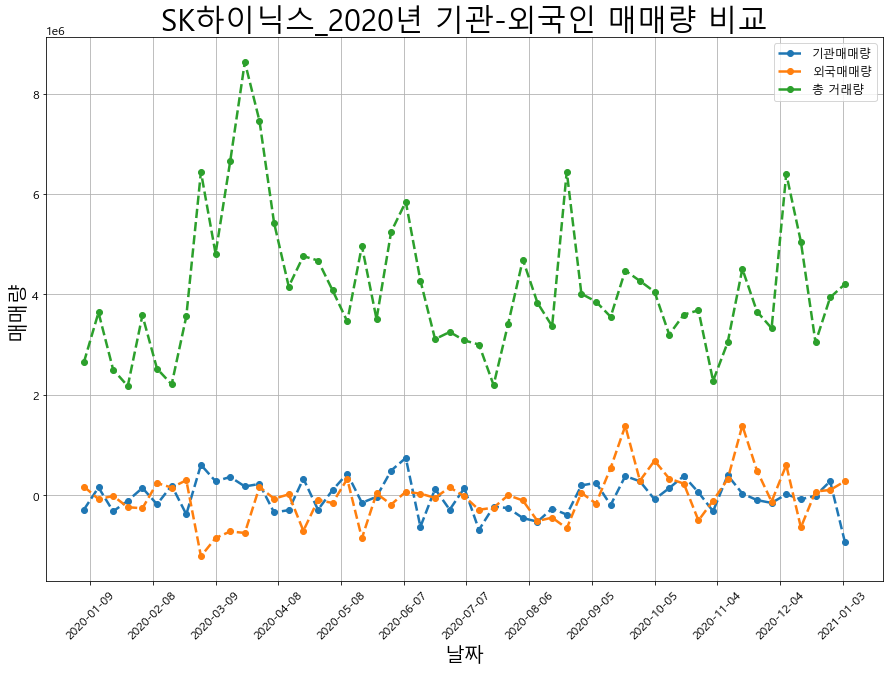

               기관매매량     외국매매량        거래량
날짜                                       
2021-01-04  694357.0  567334.0  7995016.0
2021-01-11 -762780.6  164658.4  8310990.6
2021-01-18 -340990.4  105464.2  6327546.4
2021-01-25 -116514.6  150462.6  4296781.0
2021-02-01 -131827.2 -682921.6  6124200.6
...              ...       ...        ...
2021-05-24  115509.5  -35719.5  3830557.0
2021-05-31  143745.2  421478.8  3118799.6
2021-06-07  112222.2  212799.4  2835527.0
2021-06-14 -236862.6  158668.2  4341392.2
2021-06-21 -174779.8 -279028.6  2347515.6

[25 rows x 3 columns]


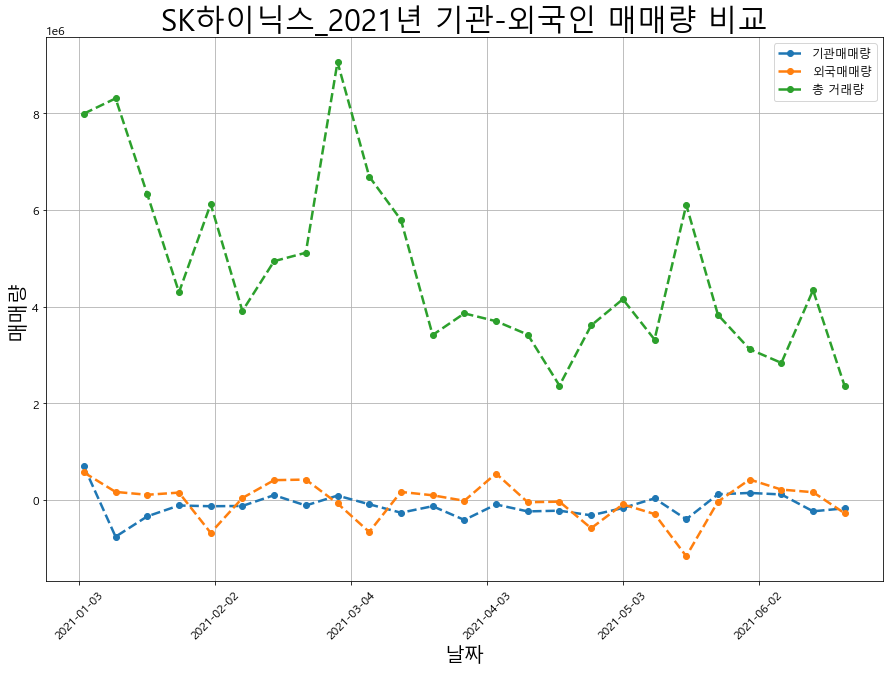

In [159]:
sk = frgn_data[frgn_data.코드=='000660']
sk

for year in range(2011,2022,1):
    start = f'{year}.01.01'
    end = f'{year}.12.31'
    draw_chart(sk, 'SK하이닉스', year,start, end )

코드         날짜        종가    전일대비   증가율        거래량     기관매매량  \
날짜                                                                           
2021-06-21  035720 2021-06-21  155000.0     0.0  0.00  8295609.0 -425174.0   
2021-06-18  035720 2021-06-18  155000.0  7000.0  4.73  7706345.0 -160027.0   
2021-06-17  035720 2021-06-17  148000.0  5000.0  3.50  5408889.0 -132545.0   
2021-06-16  035720 2021-06-16  143000.0  1500.0 -1.04  4996272.0  -45388.0   
2021-06-15  035720 2021-06-15  144500.0  2000.0  1.40  4950329.0   19493.0   
...            ...        ...       ...     ...   ...        ...       ...   
2011-01-07  035720 2011-01-07   80100.0  1900.0  2.43   131875.0   40583.0   
2011-01-06  035720 2011-01-06   78200.0   200.0  0.26    44358.0   13438.0   
2011-01-05  035720 2011-01-05   78000.0   400.0  0.52    55443.0   -4098.0   
2011-01-04  035720 2011-01-04   77600.0   800.0  1.04    77414.0  -15904.0   
2011-01-03  035720 2011-01-03   76800.0   400.0 -0.52    67366.0  -13567.0   

                외국매매량        외국보유수  외국보유율  
날짜                                         
2021-06-21 -1311534.0  145359033.0  32.74  
2021-06-18  -714792.0  146670567.0  33.04  
2021-06-17    85026.0  147395459.0   33.2  
2021-06-16 -1131953.0  147252651.0  33.17  
2021-06-15  -322052.0  148374504.0  33.42  
...               ...          ...    ...  
2011-01-07    10902.0    4833679.0  36.24  
2011-01-06     6031.0    4822777.0  36.16  
2011-01-05    22640.0    4816746.0  36.12  
2011-01-04    17060.0    4794106.0  35.95  
2011-01-03    -4555.0    4777046.0  35.82  

[2579 rows x 10 columns]

                   기관매매량    외국매매량            거래량
날짜                                              
2011-01-03 -13567.000000  -4555.0   67366.000000
2011-01-10   7454.600000  11263.8   73414.400000
2011-01-17  -7171.000000  16321.6  118651.800000
2011-01-24 -25082.200000  18228.6   76865.600000
2011-01-31  -1875.800000  31067.4  105644.600000
...                  ...      ...            ...
2011-12-05 -41497.400000  17748.6  123340.800000
2011-12-12 -13769.200000   7626.4   70834.000000
2011-12-19  -4769.600000  13926.6   64949.200000
2011-12-26 -12691.000000  -6827.4  125443.000000
2012-01-02  11708.666667 -20530.0   96320.333333

[53 rows x 3 columns]


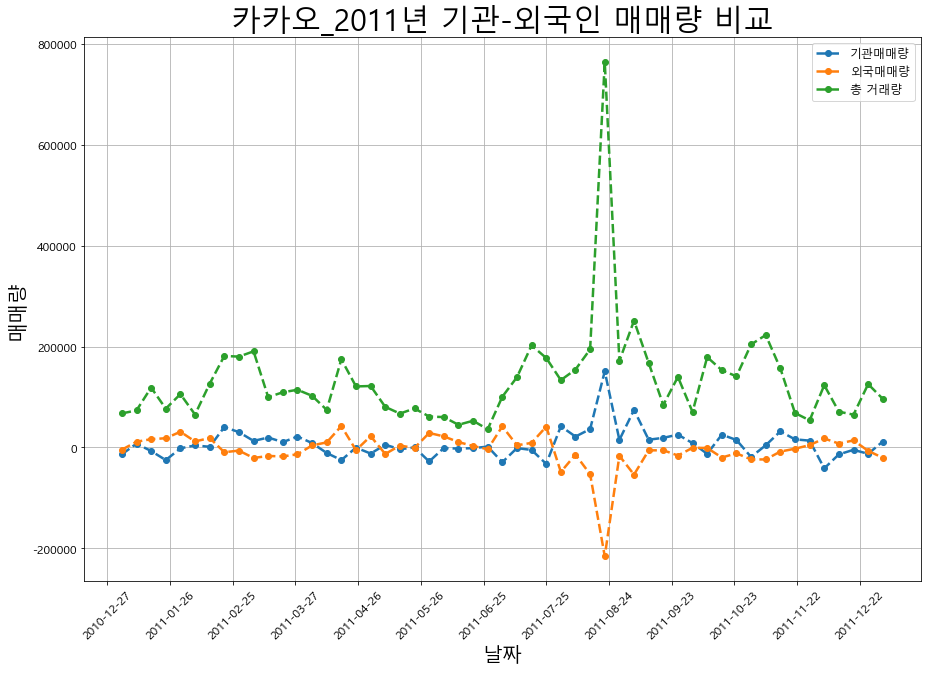

                   기관매매량     외국매매량       거래량
날짜                                          
2012-01-02   4732.000000  -1534.00   95726.0
2012-01-09    639.400000   8700.20   80843.8
2012-01-16  13531.200000   5326.80  102120.0
2012-01-23    422.750000   5018.50   84988.5
2012-01-30   7706.500000   1432.50   93381.5
...                  ...       ...       ...
2012-12-03 -15343.200000   -286.80   88591.4
2012-12-10   2368.800000  18874.00  105477.8
2012-12-17   3624.600000  -6010.40   74513.8
2012-12-24   5223.750000   1813.25   69352.0
2012-12-31  -3139.333333   7111.00   59491.0

[53 rows x 3 columns]


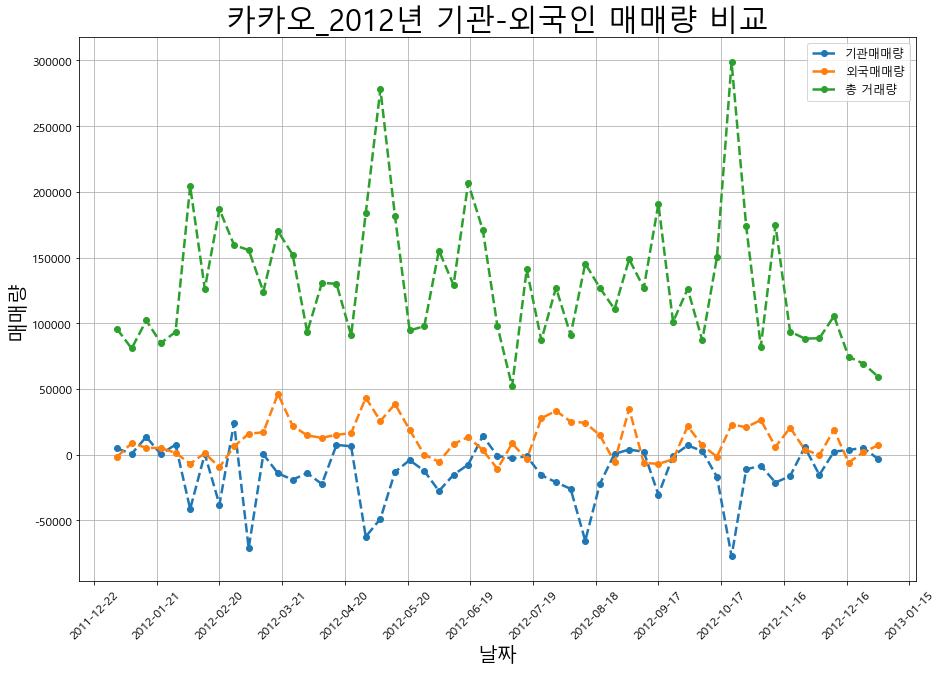

               기관매매량     외국매매량        거래량
날짜                                       
2013-01-07 -10043.25  71628.00  175669.25
2013-01-14 -29830.20  45220.40  106765.60
2013-01-21 -10620.60  16942.60   38653.60
2013-01-28  -9665.40  15484.40   66545.60
2013-02-04   2647.80   5567.40   46747.40
...              ...       ...        ...
2013-12-02   2598.00  -2404.00   35259.40
2013-12-09  11003.00  -8733.00   30029.20
2013-12-16   2629.60    475.00   31949.60
2013-12-23  -3785.40   3780.80   42369.40
2013-12-30   -400.50  -4452.75   21466.50

[52 rows x 3 columns]


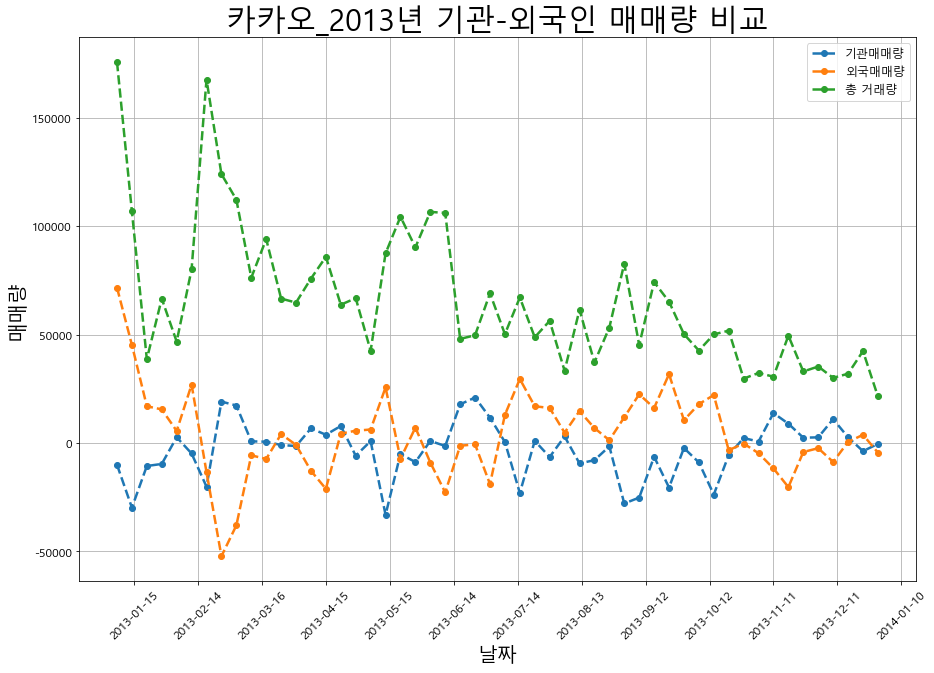

                   기관매매량         외국매매량            거래량
날짜                                                   
2014-01-06   -966.333333   5501.333333   20802.333333
2014-01-13  -7536.400000   7722.800000   42348.400000
2014-01-20  12114.800000  -7726.800000   98662.400000
2014-01-27   8542.600000  -5433.000000   71817.600000
2014-02-03   9231.666667  -6294.666667   53649.000000
...                  ...           ...            ...
2014-12-08 -24432.600000  23787.600000  403505.400000
2014-12-15 -18748.800000   4374.800000  584722.200000
2014-12-22  41618.400000  -3513.000000  470975.600000
2014-12-29  17818.250000 -33488.250000  337932.000000
2015-01-05  50341.000000 -47444.000000  205936.000000

[53 rows x 3 columns]


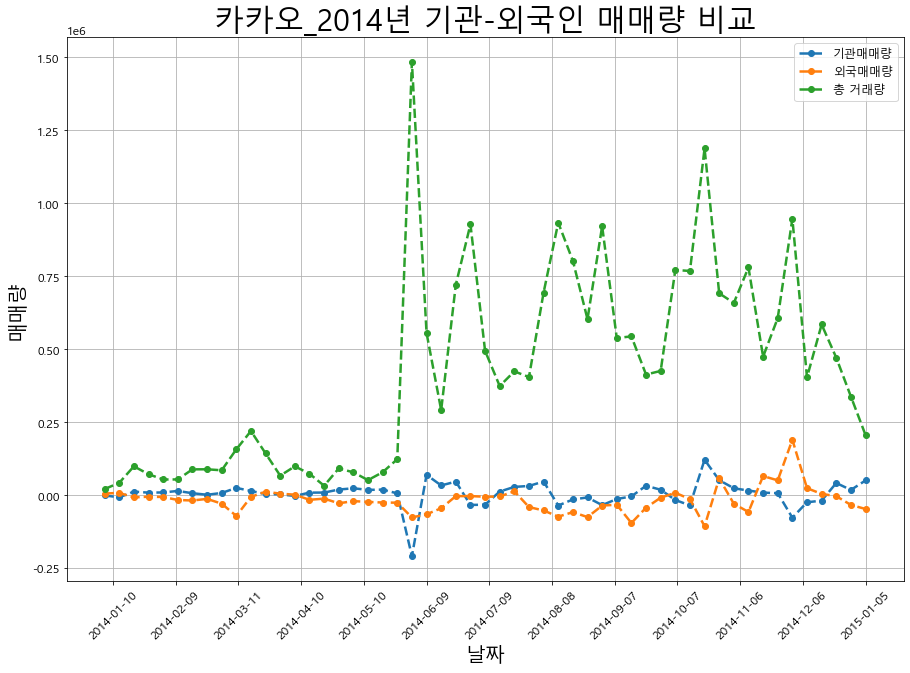

                기관매매량     외국매매량         거래량
날짜                                         
2015-01-05  149828.00  35423.00  1268719.00
2015-01-12   89818.40  -7889.00   858226.00
2015-01-19   68259.00 -26879.60   723780.20
2015-01-26   38018.60   6654.20   570920.80
2015-02-02   12374.00 -35949.40   511599.00
...               ...       ...         ...
2015-12-07   30482.40  30248.40   467997.20
2015-12-14  -23953.40   2352.40   257632.20
2015-12-21   -1935.20  15198.00   171232.60
2015-12-28   -1935.25  31088.75   225230.75
2016-01-04    6960.00  38474.00   325452.00

[53 rows x 3 columns]


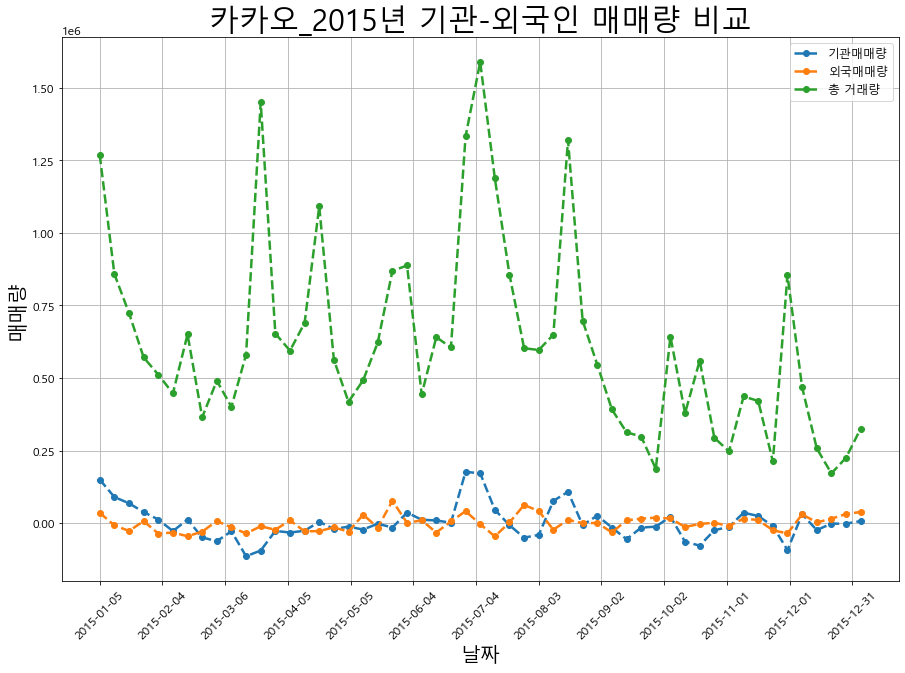

                   기관매매량    외국매매량            거래량
날짜                                              
2016-01-04 -29064.000000  14445.0  297687.000000
2016-01-11  -2155.800000  14442.6  430424.200000
2016-01-18 -18133.000000  63912.6  380608.800000
2016-01-25 -33206.400000  22733.4  326516.800000
2016-02-01 -63219.800000  12851.2  275007.200000
...                  ...      ...            ...
2016-12-05 -14007.400000 -11481.6  204232.600000
2016-12-12  18848.400000 -10260.8  212963.600000
2016-12-19   2671.200000 -28074.6  189198.800000
2016-12-26   8856.000000 -52346.6  211887.200000
2017-01-02  17945.666667 -13571.0  213391.333333

[53 rows x 3 columns]


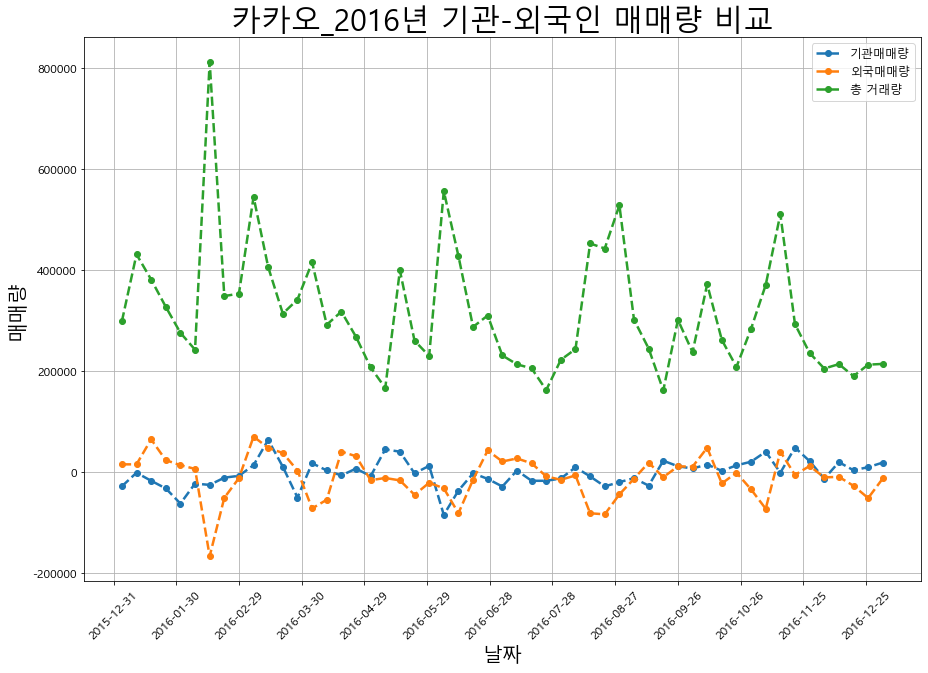

                   기관매매량         외국매매량        거래량
날짜                                               
2017-01-02 -18684.000000 -21339.000000   143140.0
2017-01-09  22950.200000  51374.000000   585640.8
2017-01-16 -26442.400000  -3130.600000   307379.8
2017-01-23 -11841.400000 -41460.600000   257056.4
2017-01-30 -44961.000000 -32825.666667   350825.0
...                  ...           ...        ...
2017-12-04 -22463.800000 -78658.400000   966176.2
2017-12-11   7284.800000  17115.400000   582707.8
2017-12-18  42483.000000  -4570.800000   635347.8
2017-12-25   4272.750000  43716.750000   629877.5
2018-01-01  46477.666667 -68812.333333  1082498.0

[53 rows x 3 columns]


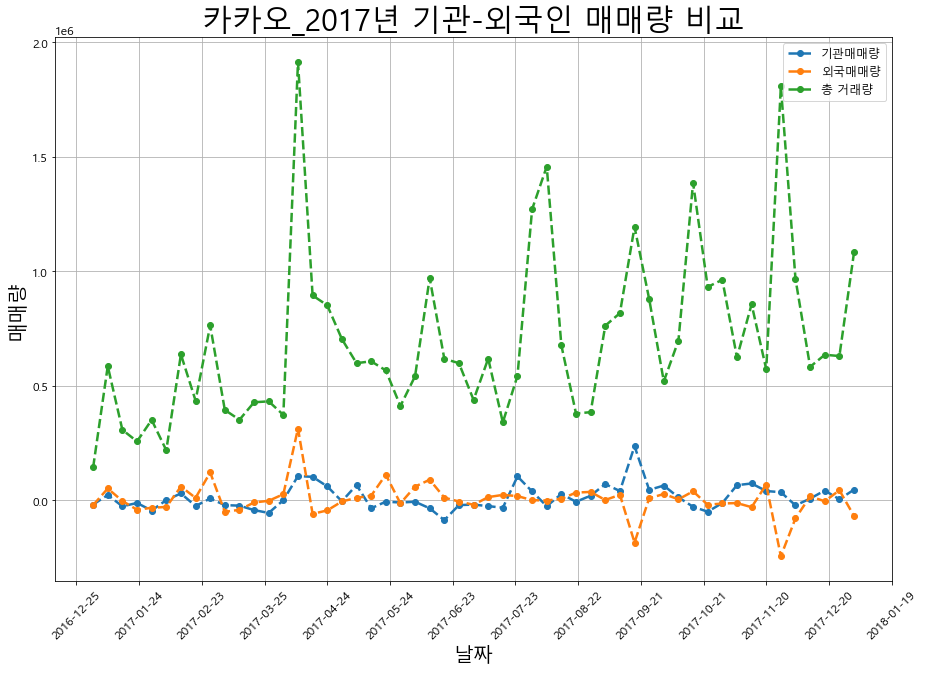

                    기관매매량          외국매매량           거래량
날짜                                                    
2018-01-08  176991.600000   14444.000000  1.481987e+06
2018-01-15    6950.800000  -92475.200000  1.556988e+06
2018-01-22   48035.800000 -553458.000000  1.489357e+06
2018-01-29   47433.800000 -186788.200000  8.712118e+05
2018-02-05   72284.600000 -109648.600000  1.243907e+06
...                   ...            ...           ...
2018-12-03     982.000000   36193.600000  2.656610e+05
2018-12-10   29556.000000   35187.600000  3.139572e+05
2018-12-17    -122.200000   44694.400000  3.440162e+05
2018-12-24  -25555.600000    2598.800000  3.473644e+05
2018-12-31   22956.666667   -1446.333333  3.002087e+05

[52 rows x 3 columns]


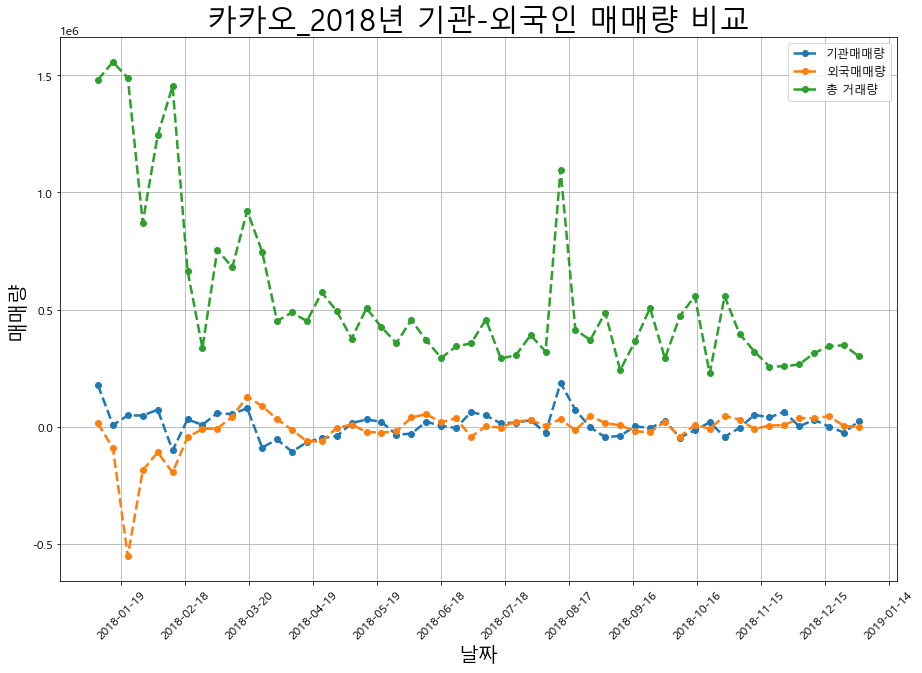

               기관매매량     외국매매량        거래량
날짜                                       
2019-01-07  11760.00 -52882.00  274333.00
2019-01-14 -26865.80 -19258.20  304599.40
2019-01-21   4965.80 -73736.40  315560.20
2019-01-28  52537.60 -34157.20  344334.60
2019-02-04 -79879.75 -40365.50  431189.50
...              ...       ...        ...
2019-12-02 -12054.80  35105.40  319137.20
2019-12-09 -12587.60  26310.80  398554.80
2019-12-16 -51481.00  37016.40  492088.00
2019-12-23 -14490.40   7587.60  306656.20
2019-12-30  20542.00  49364.25  451968.25

[52 rows x 3 columns]


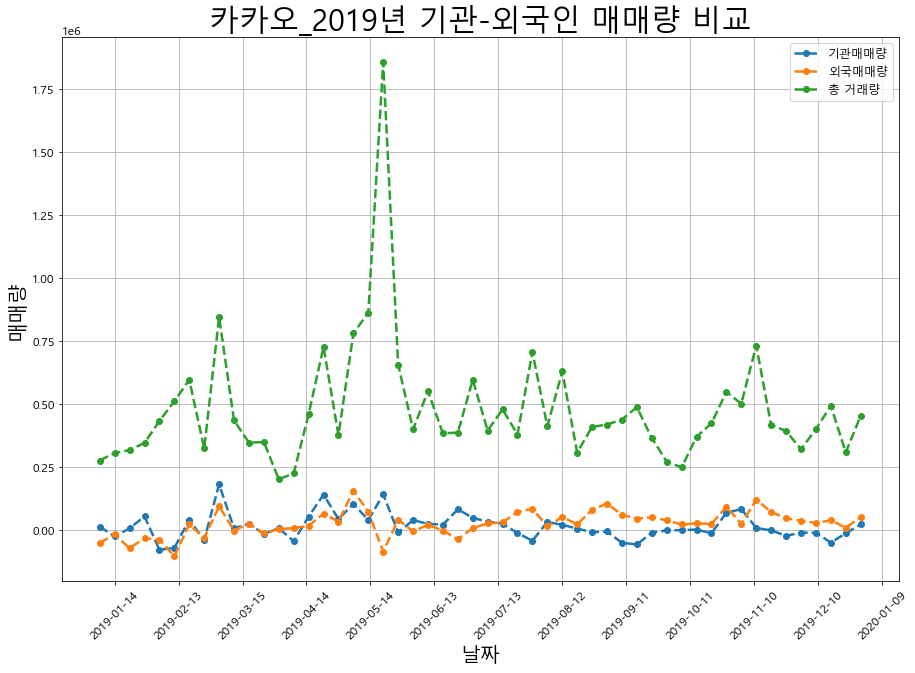

                   기관매매량          외국매매량            거래량
날짜                                                    
2020-01-06  -5091.000000   39644.000000  316536.666667
2020-01-13  43517.400000   86138.400000  689539.400000
2020-01-20 -24427.600000   39706.200000  376137.600000
2020-01-27 -31625.333333  -20125.333333  405641.666667
2020-02-03  22535.000000   -3307.200000  391455.400000
...                  ...            ...            ...
2020-12-07  28049.800000   32741.000000  762816.400000
2020-12-14  -5945.600000  -92927.000000  617151.000000
2020-12-21  36843.400000    6620.800000  472970.600000
2020-12-28  60053.000000   37637.750000  654516.000000
2021-01-04 -25274.000000  168551.500000  835273.000000

[53 rows x 3 columns]


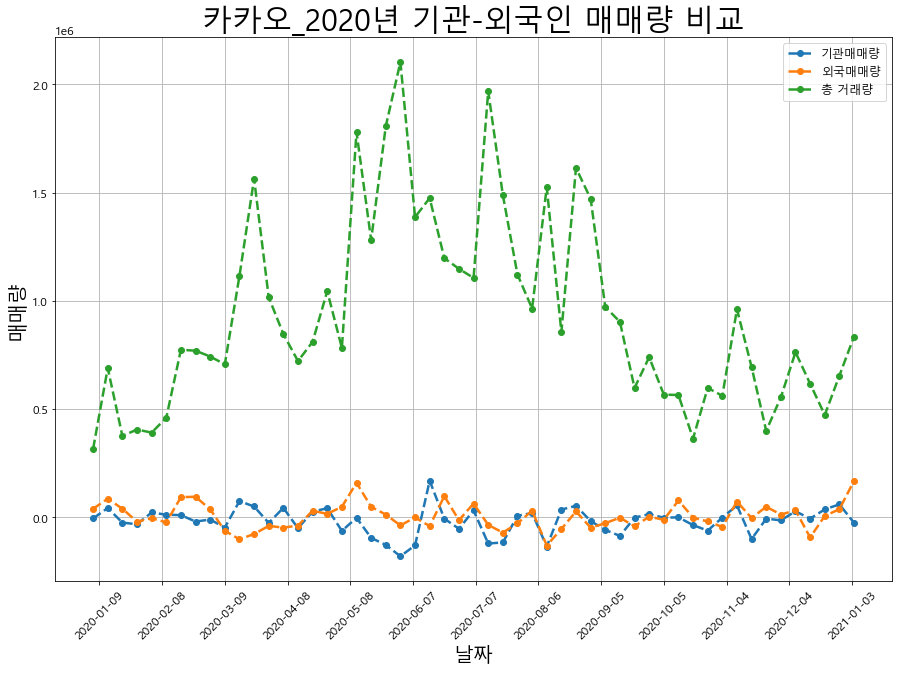

               기관매매량      외국매매량        거래량
날짜                                        
2021-01-04  -62182.0  108332.00   853740.0
2021-01-11  -36122.6  163660.80  1716785.4
2021-01-18  -59216.8   43695.20  1004412.0
2021-01-25   16711.2   54353.60   748399.0
2021-02-01  -16480.2  -96870.20   886817.2
...              ...        ...        ...
2021-05-24  145472.0  115198.75  2113664.5
2021-05-31  186411.4  392545.00  3493863.2
2021-06-07     226.2   75361.60  2496434.4
2021-06-14  -21401.2  248952.80  3932785.0
2021-06-21 -148728.2 -679061.00  6271488.8

[25 rows x 3 columns]


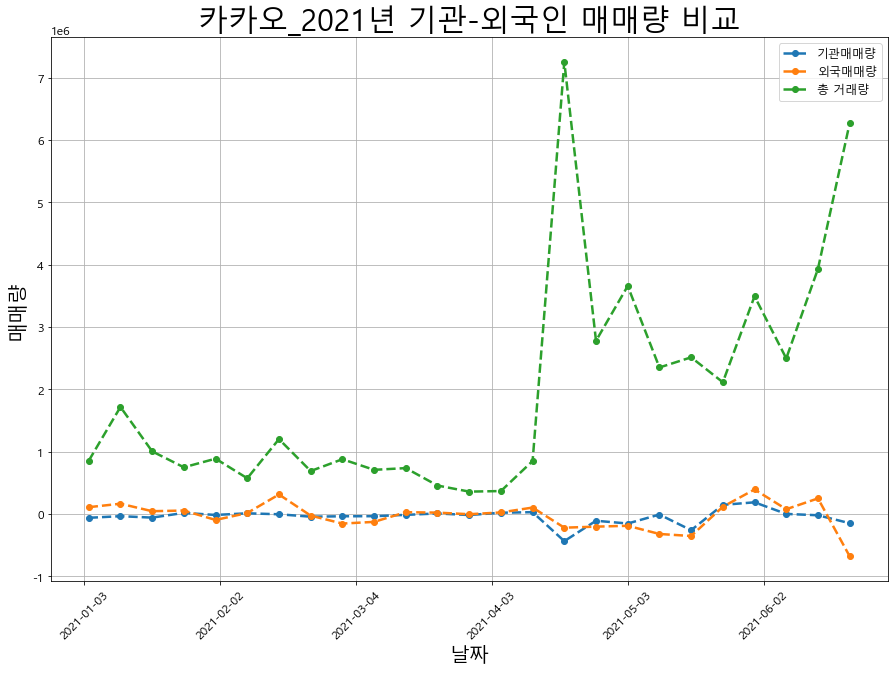

In [160]:
kakao = frgn_data[frgn_data.코드=='035720']
kakao

for year in range(2011,2022,1):
    start = f'{year}.01.01'
    end = f'{year}.12.31'
    draw_chart(kakao, '카카오', year,start, end )

코드         날짜        종가    전일대비   증가율        거래량     기관매매량  \
날짜                                                                           
2021-06-21  035420 2021-06-21  397000.0  1000.0 -0.25   806610.0  -69862.0   
2021-06-18  035420 2021-06-18  398000.0  8500.0  2.18  1268656.0  214049.0   
2021-06-17  035420 2021-06-17  389500.0  1500.0 -0.38   670522.0 -100591.0   
2021-06-16  035420 2021-06-16  391000.0  4000.0  1.03   836281.0   76877.0   
2021-06-15  035420 2021-06-15  387000.0     0.0  0.00   625594.0   45790.0   
...            ...        ...       ...     ...   ...        ...       ...   
2011-01-07  035420 2011-01-07  225000.0  3500.0  1.58   202713.0   23727.0   
2011-01-06  035420 2011-01-06  221500.0  1000.0 -0.45   191166.0   -1871.0   
2011-01-05  035420 2011-01-05  222500.0  1000.0  0.45   187526.0   17149.0   
2011-01-04  035420 2011-01-04  221500.0     0.0  0.00   152706.0  -11890.0   
2011-01-03  035420 2011-01-03  221500.0  5500.0 -2.42   152703.0   18610.0   

              외국매매량       외국보유수  외국보유율  
날짜                                      
2021-06-21  67172.0  93517358.0  56.93  
2021-06-18  41406.0  93450186.0  56.89  
2021-06-17 -16313.0  93411080.0  56.87  
2021-06-16  21416.0  93374137.0  56.84  
2021-06-15 -93018.0  93302721.0   56.8  
...             ...         ...    ...  
2011-01-07  -8244.0  31935186.0  66.36  
2011-01-06   5408.0  31943430.0  66.37  
2011-01-05  -4325.0  31938877.0  66.36  
2011-01-04 -11905.0  31946657.0  66.38  
2011-01-03 -32057.0  31960614.0  66.41  

[2579 rows x 10 columns]

                   기관매매량          외국매매량            거래량
날짜                                                    
2011-01-03  18610.000000  -32057.000000  152703.000000
2011-01-10   8431.800000  -25308.600000  199052.000000
2011-01-17  87883.000000 -163195.600000  502956.600000
2011-01-24 -17138.800000   20545.800000  382318.200000
2011-01-31 -23102.000000   20922.000000  213769.400000
...                  ...            ...            ...
2011-12-05 -51628.600000    2257.400000  380506.600000
2011-12-12  15750.000000  -11961.400000  238431.200000
2011-12-19 -10713.600000   12352.800000  164616.200000
2011-12-26 -37514.800000   48075.600000  161438.000000
2012-01-02 -13810.333333   13210.666667  123630.333333

[53 rows x 3 columns]


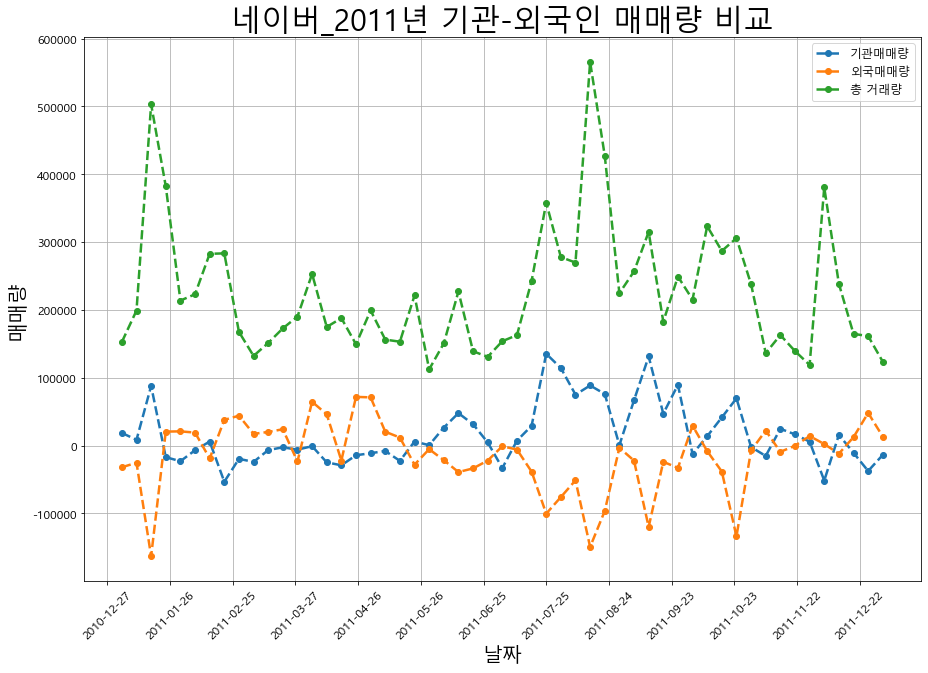

                   기관매매량         외국매매량            거래량
날짜                                                   
2012-01-02  11143.000000 -14115.000000   79684.000000
2012-01-09   6068.200000  21930.400000  116885.600000
2012-01-16  13533.800000  20721.600000  121022.200000
2012-01-23 -10700.500000  52679.750000  178487.000000
2012-01-30  -9115.000000 -29428.750000  230800.750000
...                  ...           ...            ...
2012-12-03  -6925.200000  -7361.800000  240850.400000
2012-12-10 -75741.600000  14153.400000  397345.800000
2012-12-17 -86583.000000  12588.600000  327100.800000
2012-12-24 -38730.250000  37255.750000  395366.500000
2012-12-31  18517.333333 -14967.666667  164185.333333

[53 rows x 3 columns]


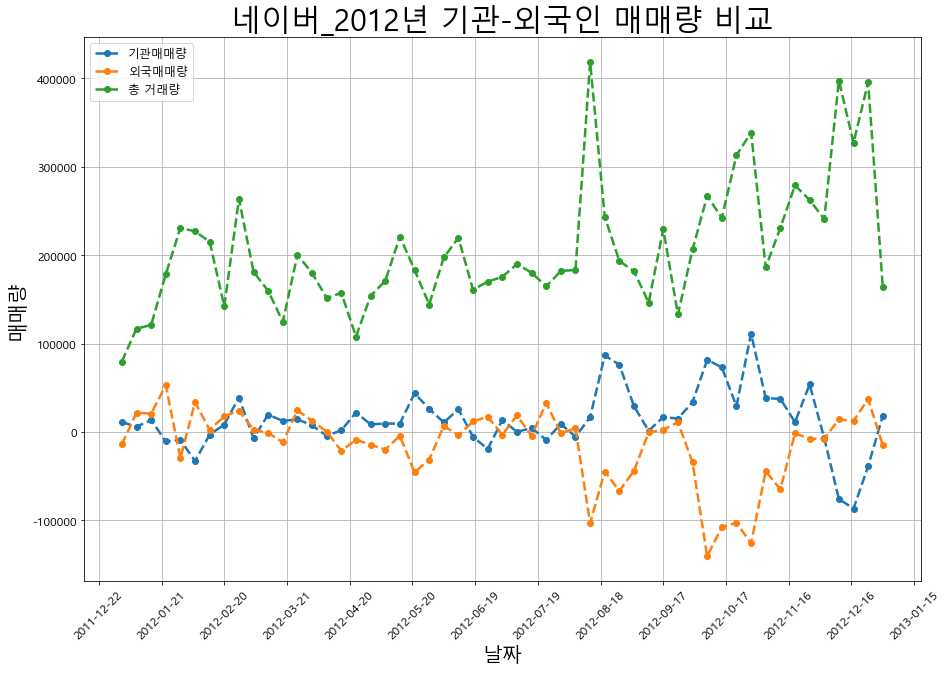

               기관매매량    외국매매량        거래량
날짜                                      
2013-01-07 -28261.75  31400.5  287598.00
2013-01-14 -27645.40   4450.0  198635.20
2013-01-21 -14010.00  15960.8  223764.80
2013-01-28  27564.20  -2564.8  199611.00
2013-02-04  -2225.40  10694.4  195030.60
...              ...      ...        ...
2013-12-02  -1223.60  15007.0  175108.80
2013-12-09     77.40  -1798.4  159312.00
2013-12-16   1615.00  -1840.4  139583.00
2013-12-23 -10454.60  22580.8  169189.60
2013-12-30  -2974.75   2383.0  132152.25

[52 rows x 3 columns]


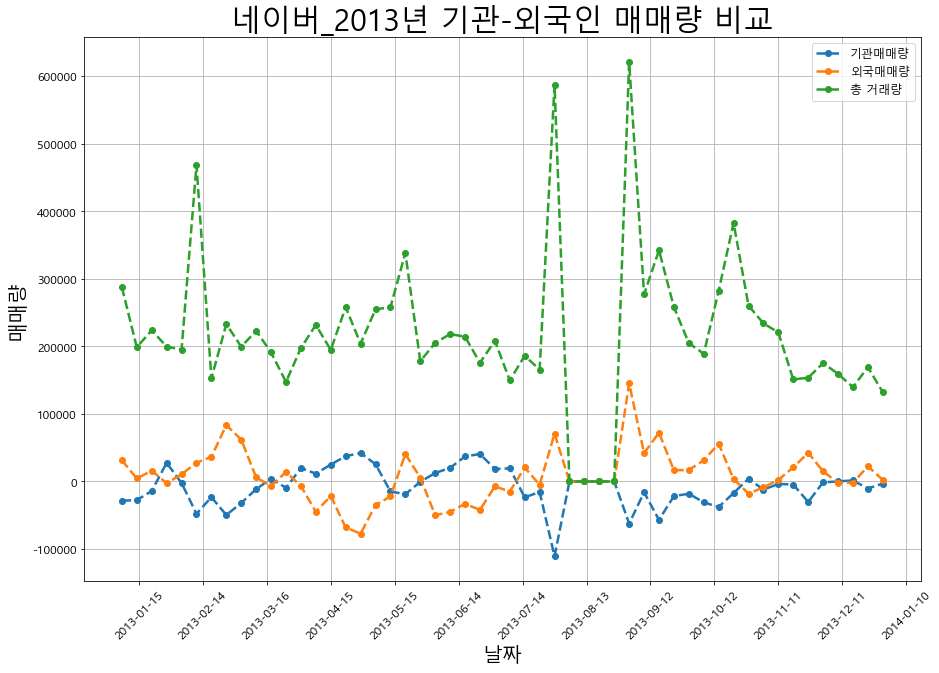

                   기관매매량         외국매매량            거래량
날짜                                                   
2014-01-06 -38722.666667  25807.333333  172101.333333
2014-01-13 -24362.000000   4836.400000  194897.200000
2014-01-20   9595.800000   8148.600000  136628.000000
2014-01-27  14381.200000 -28627.600000  182983.200000
2014-02-03  15997.000000 -24786.000000  138842.000000
...                  ...           ...            ...
2014-12-08  -7752.200000    604.600000   65962.200000
2014-12-15   3886.400000  -9996.400000   77640.400000
2014-12-22  14469.600000   3609.400000   66829.000000
2014-12-29     24.000000   2744.750000   41388.250000
2015-01-05 -27707.000000  12153.000000   85390.000000

[53 rows x 3 columns]


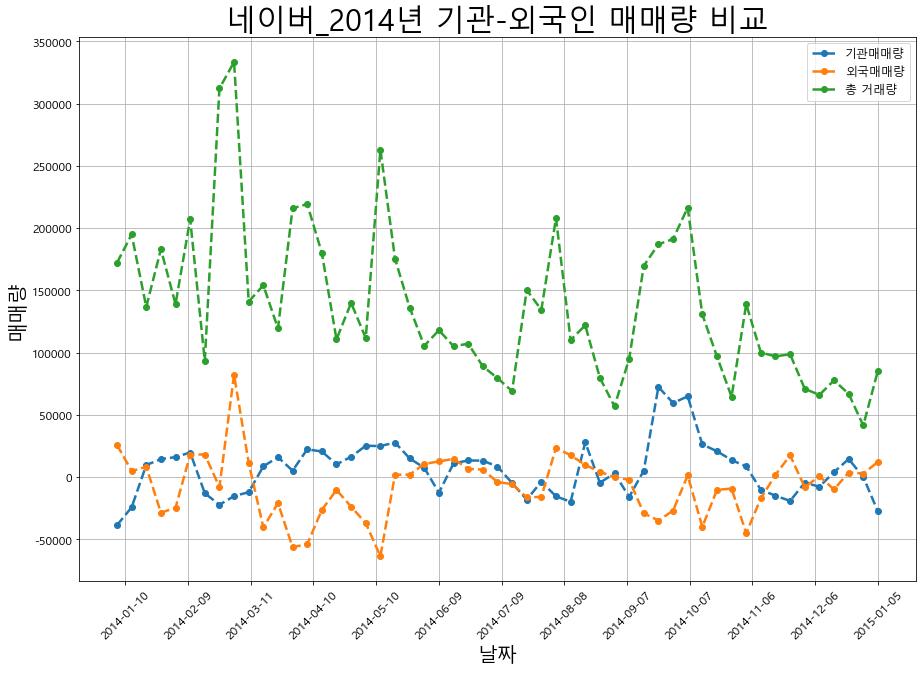

              기관매매량    외국매매량       거래량
날짜                                    
2015-01-05  12984.5   2948.5   88398.5
2015-01-12  10698.4   -354.0   62282.8
2015-01-19  26896.0 -12268.2  101595.6
2015-01-26   8893.0  -8940.2   84929.2
2015-02-02  -3363.6 -42628.4  179847.8
...             ...      ...       ...
2015-12-07   6549.0 -10836.8   73639.2
2015-12-14  20514.4 -13579.4   77172.6
2015-12-21  17355.2   -727.0   63484.8
2015-12-28  10568.0     -7.0   41912.0
2016-01-04    -14.5   2799.0   57431.5

[53 rows x 3 columns]


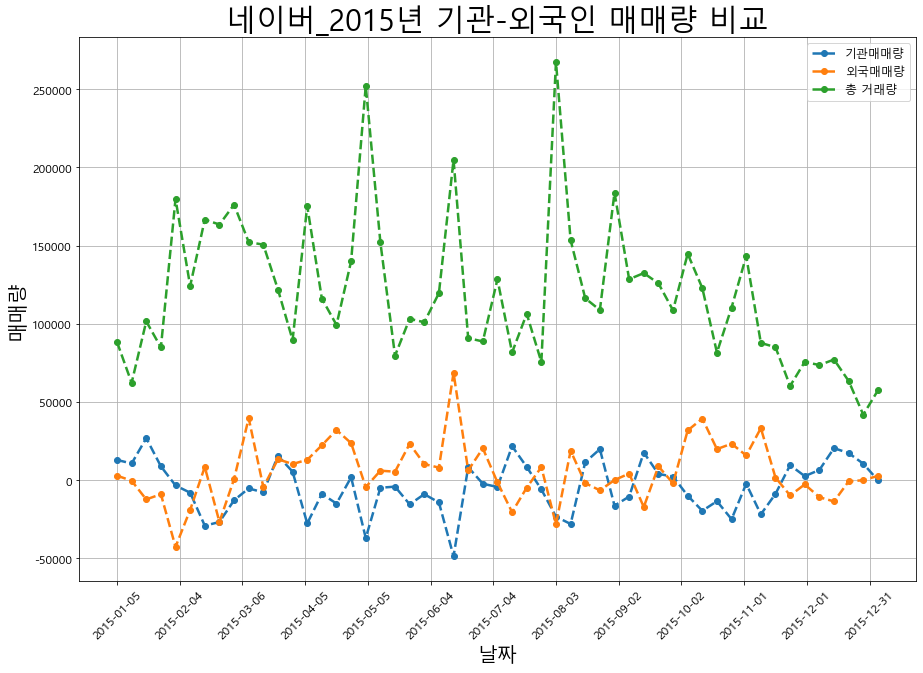

                   기관매매량         외국매매량            거래량
날짜                                                   
2016-01-04 -21048.000000 -25296.000000   93272.000000
2016-01-11   7952.000000 -12821.200000   88586.600000
2016-01-18  15511.000000  -2107.800000  105014.000000
2016-01-25  20505.600000 -20959.600000  105515.600000
2016-02-01  14420.000000 -40585.400000  162808.600000
...                  ...           ...            ...
2016-12-05  -5656.200000 -12524.400000   98232.800000
2016-12-12   5880.400000 -10301.000000   85850.600000
2016-12-19    -58.200000   3231.400000   69107.600000
2016-12-26  -3330.800000   2611.600000   52505.000000
2017-01-02 -10751.333333   6760.333333   48674.333333

[53 rows x 3 columns]


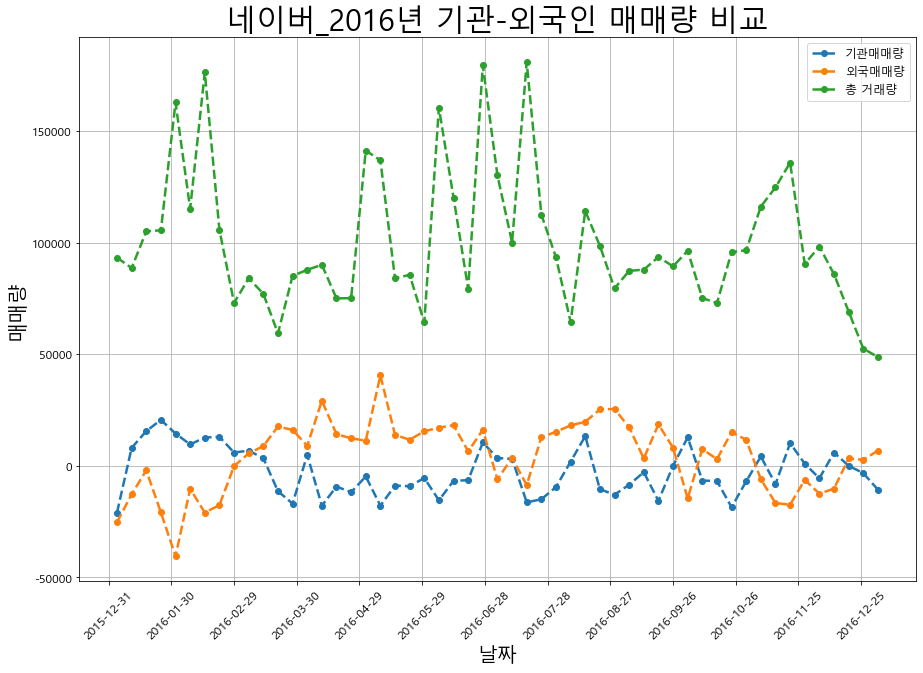

                   기관매매량         외국매매량            거래량
날짜                                                   
2017-01-02   -858.000000   5021.000000   30777.000000
2017-01-09  -2436.800000  -1371.400000   73561.200000
2017-01-16    650.800000   -628.800000   55155.200000
2017-01-23  -6806.600000   3069.800000   67606.400000
2017-01-30 -18116.000000  -4010.000000  166768.000000
...                  ...           ...            ...
2017-12-04   4417.200000  13404.200000  126766.800000
2017-12-11   2500.000000   4208.600000   80939.200000
2017-12-18   7819.000000  17151.400000   99389.800000
2017-12-25  13054.750000   2231.250000   79540.750000
2018-01-01   6695.333333   8716.333333   75510.333333

[53 rows x 3 columns]


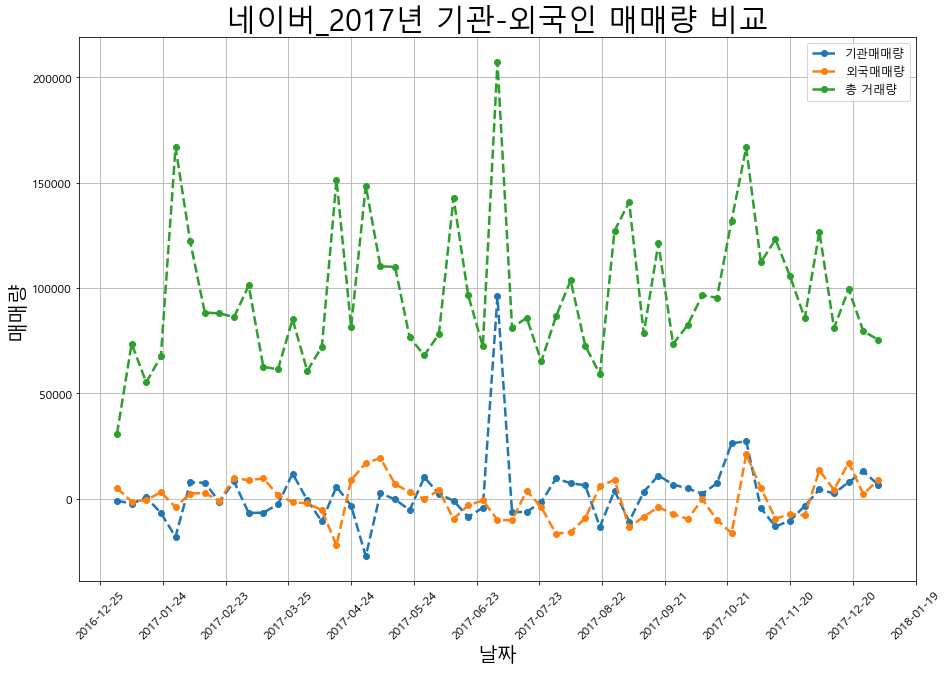

              기관매매량    외국매매량       거래량
날짜                                    
2018-01-08   9790.8   6508.4  128327.6
2018-01-15   4621.2  -7613.2   88118.4
2018-01-22  -1609.6  -9977.4   93748.8
2018-01-29  13427.2 -13135.0  116414.2
2018-02-05  -6035.4  -9227.8   97405.4
...             ...      ...       ...
2018-12-03   2031.4  22442.8  626131.2
2018-12-10  14030.0 -30389.6  441788.0
2018-12-17  -4141.8  16229.8  504766.4
2018-12-24  82405.6 -59996.2  375921.0
2018-12-31   6977.0   9793.0  323273.0

[52 rows x 3 columns]


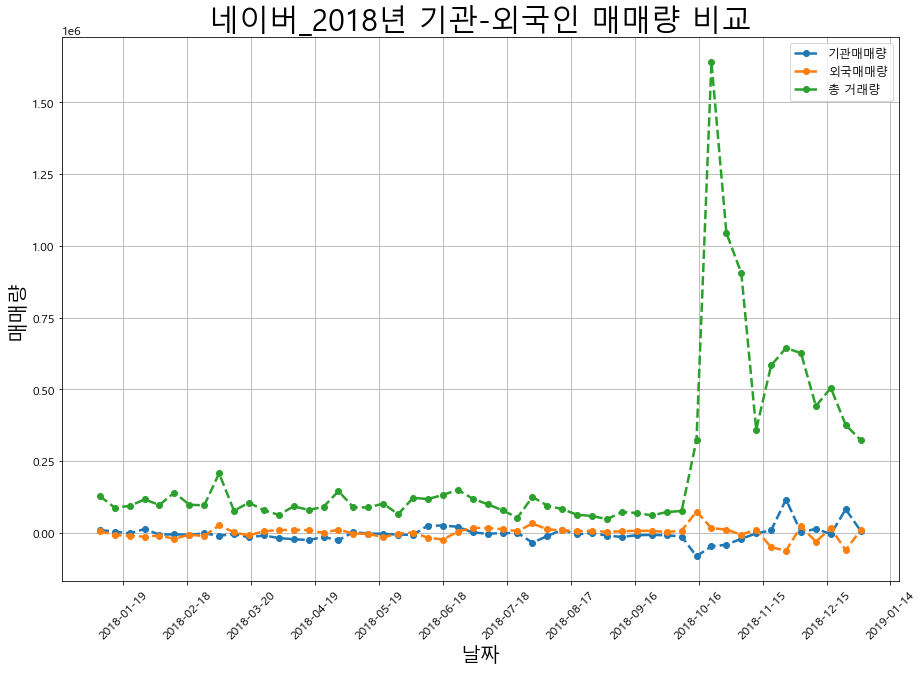

               기관매매량     외국매매량        거래량
날짜                                       
2019-01-07  60321.00  15289.50  476136.00
2019-01-14   9533.80 -10724.60  379789.40
2019-01-21    763.20  34029.20  360347.80
2019-01-28  13228.40 -12396.40  377801.00
2019-02-04  45826.25  17292.50  614552.25
...              ...       ...        ...
2019-12-02  37750.60 -27892.60  390502.20
2019-12-09  10903.00  26101.60  245372.80
2019-12-16  21856.60  35511.00  335957.60
2019-12-23  -4936.00  41380.60  357838.60
2019-12-30  21281.25 -10094.75  266720.00

[52 rows x 3 columns]


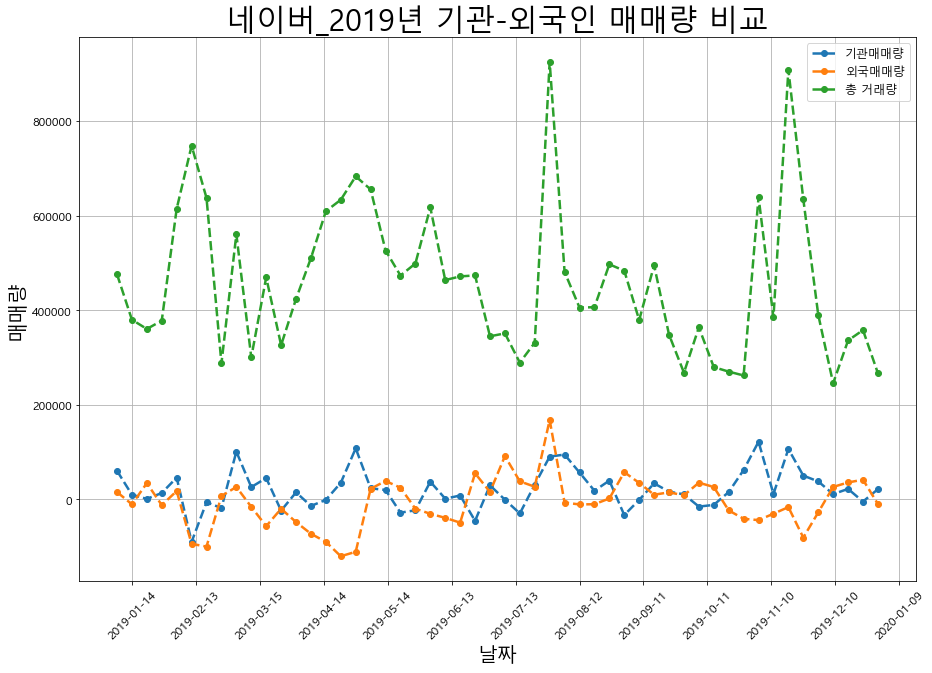

                기관매매량          외국매매량            거래량
날짜                                                 
2020-01-06 -101607.00   37220.333333  347700.666667
2020-01-13  -40294.40   44412.600000  483466.800000
2020-01-20  -21075.80    -236.000000  362184.600000
2020-01-27   -4571.00    6665.000000  451153.000000
2020-02-03   50045.40  -64403.400000  541257.000000
...               ...            ...            ...
2020-12-07   -2841.40   81029.400000  809730.200000
2020-12-14   -5302.80   -5486.800000  623714.400000
2020-12-21  -24809.40   -1355.000000  471417.000000
2020-12-28   46367.75    8645.250000  562264.250000
2021-01-04  -40572.00  240848.500000  848208.500000

[53 rows x 3 columns]


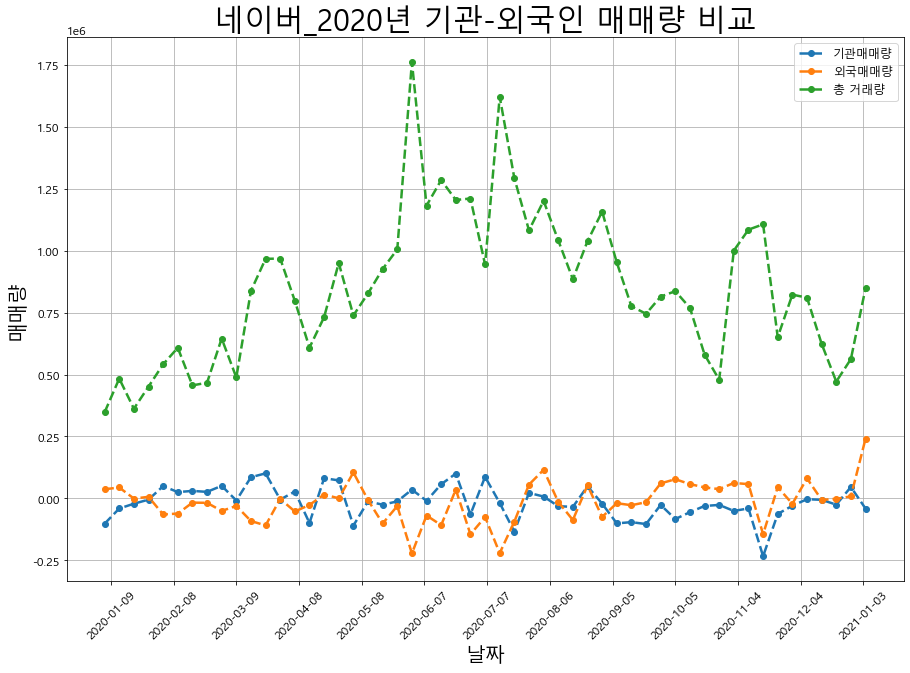

                기관매매량      외국매매량        거래량
날짜                                         
2021-01-04 -154478.00   46570.00   947178.0
2021-01-11  -89738.80  111546.60  1876962.4
2021-01-18  -51380.20   49095.60  1397593.4
2021-01-25   91892.60  215911.00  1720990.8
2021-02-01   66843.60  -46800.00  1455750.0
...               ...        ...        ...
2021-05-24   45504.75      -3.75   496590.5
2021-05-31   42076.40  -25403.40   555325.6
2021-06-07  -25169.20    7452.20   384050.8
2021-06-14   53107.00  112398.00   820409.0
2021-06-21   33252.60    4132.60   841532.6

[25 rows x 3 columns]


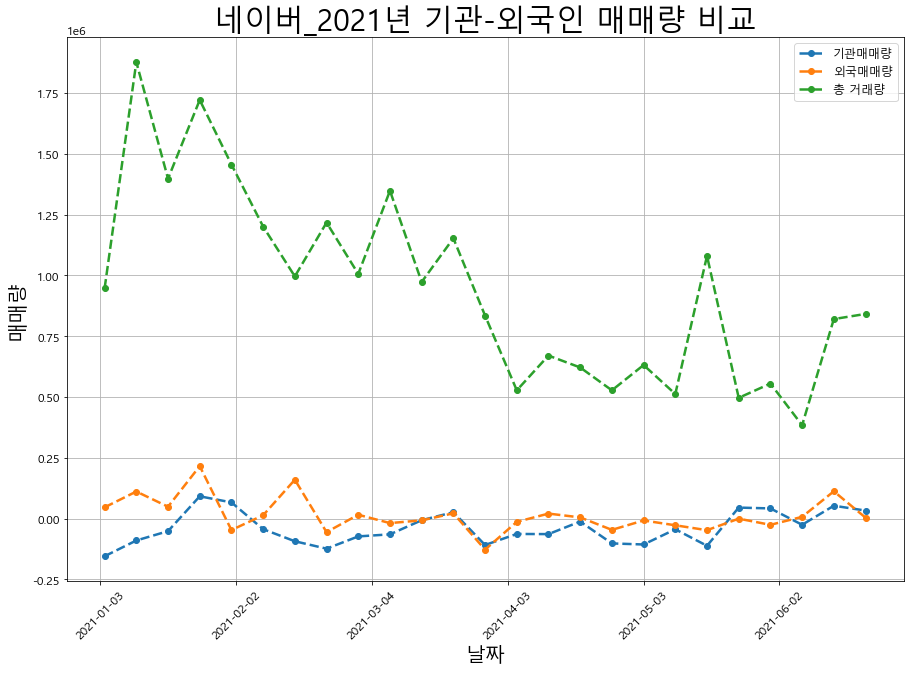

In [161]:
naver = frgn_data[frgn_data.코드=='035420']
naver

for year in range(2011,2022,1):
    start = f'{year}.01.01'
    end = f'{year}.12.31'
    draw_chart(naver, '네이버', year,start, end )

코드         날짜        종가     전일대비   증가율        거래량     기관매매량  \
날짜                                                                            
2021-06-21  005935 2021-06-21   73500.0    500.0 -0.68  1299813.0 -102847.0   
2021-06-18  005935 2021-06-18   74000.0    300.0 -0.40  1426525.0  -89072.0   
2021-06-17  005935 2021-06-17   74300.0    400.0 -0.54   973761.0 -137551.0   
2021-06-16  005935 2021-06-16   74700.0    400.0  0.54   923875.0   -7224.0   
2021-06-15  005935 2021-06-15   74300.0    100.0  0.13   838110.0  -25692.0   
...            ...        ...       ...      ...   ...        ...       ...   
2011-01-07  005935 2011-01-07  663000.0   8000.0 -1.19    23607.0    4000.0   
2011-01-06  005935 2011-01-06  671000.0   8000.0 -1.18    11746.0    3164.0   
2011-01-05  005935 2011-01-05  679000.0  12000.0 -1.74    17744.0    3364.0   
2011-01-04  005935 2011-01-04  691000.0   4000.0  0.58    18492.0   -3862.0   
2011-01-03  005935 2011-01-03  687000.0  38000.0  5.86    12012.0   -4244.0   

               외국매매량        외국보유수  외국보유율  
날짜                                        
2021-06-21 -394564.0  629200096.0  76.46  
2021-06-18 -249179.0  629594660.0  76.51  
2021-06-17   52810.0  629873839.0  76.54  
2021-06-16  305457.0  629744103.0  76.53  
2021-06-15  -34409.0  629528646.0   76.5  
...              ...          ...    ...  
2011-01-07   -8056.0   18919278.0  82.86  
2011-01-06   -3825.0   18927334.0  82.89  
2011-01-05   -5225.0   18931159.0  82.91  
2011-01-04    7747.0   18936384.0  82.93  
2011-01-03    8074.0   18928637.0   82.9  

[2579 rows x 10 columns]

             기관매매량   외국매매량      거래량
날짜                                 
2011-01-03 -4244.0  8074.0  12012.0
2011-01-10 -1038.8   698.2  20193.0
2011-01-17  1231.6 -2183.0  16841.4
2011-01-24  5909.0 -6706.8  20908.2
2011-01-31  3170.8 -2248.0  17937.0
...            ...     ...      ...
2011-12-05  5999.4 -3670.0  44268.6
2011-12-12   751.2 -1009.6  51367.4
2011-12-19  3273.2 -4587.0  30655.2
2011-12-26  5488.0 -5865.8  19617.8
2012-01-02  1900.0  2361.0  21028.0

[53 rows x 3 columns]


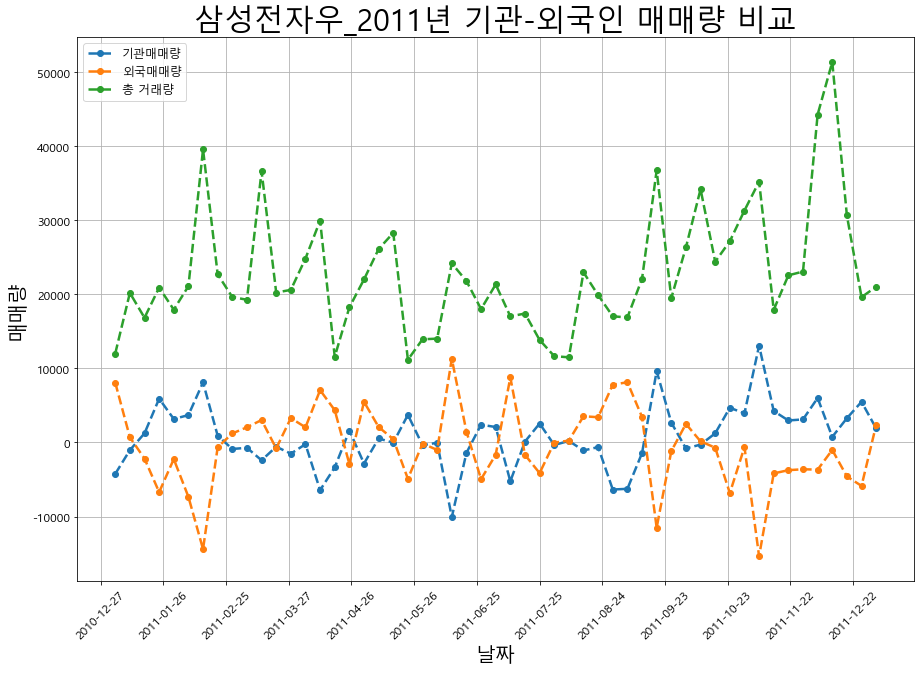

                  기관매매량        외국매매량       거래량
날짜                                            
2012-01-02  2886.000000 -1055.000000   5149.00
2012-01-09 -5639.200000  5947.000000  21751.60
2012-01-16  6673.400000 -9925.600000  31061.80
2012-01-23   504.500000  6095.750000  30568.25
2012-01-30  5859.750000 -5361.000000  47176.50
...                 ...          ...       ...
2012-12-03 -2800.400000  3160.600000  40373.00
2012-12-10   661.800000  -967.400000  33399.80
2012-12-17  2360.200000 -3061.400000  38245.60
2012-12-24  1644.250000 -2970.500000  35795.00
2012-12-31  6028.666667 -6258.333333  26555.00

[53 rows x 3 columns]


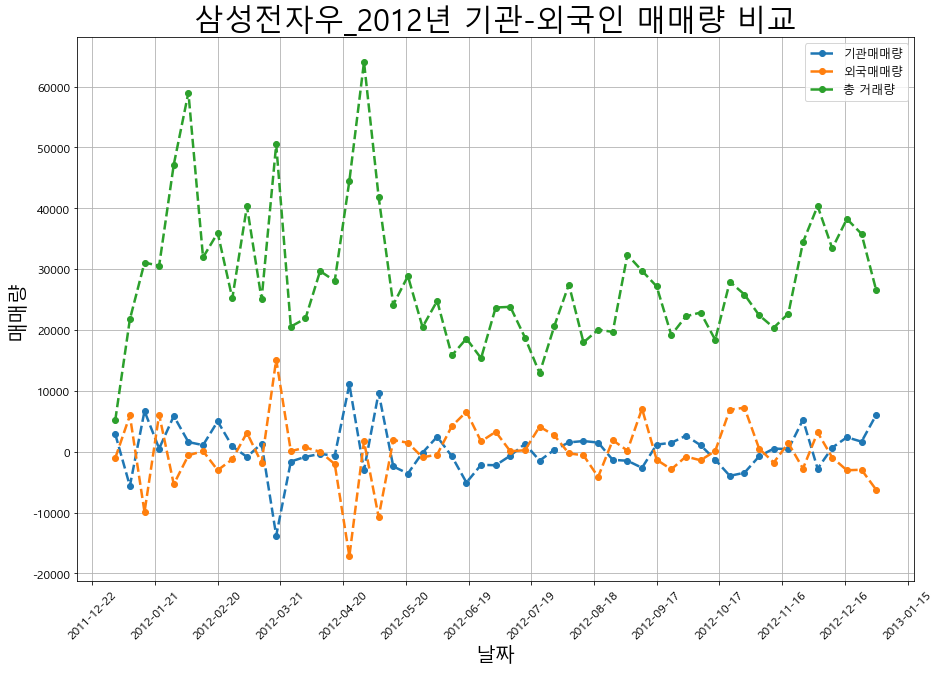

              기관매매량    외국매매량      거래량
날짜                                   
2013-01-07  6074.75  -5358.5  51741.0
2013-01-14  2785.00  -2847.0  43040.2
2013-01-21 -6341.40   7074.0  36014.2
2013-01-28 -6264.00   6634.6  28327.8
2013-02-04 -5171.60   8477.4  48738.0
...             ...      ...      ...
2013-12-02  1385.00  -3057.6  38902.8
2013-12-09  -207.80    330.6  33230.6
2013-12-16  5406.20  -1435.4  63549.6
2013-12-23  3127.00    901.0  46835.0
2013-12-30 -9913.50  10173.5  32787.5

[52 rows x 3 columns]


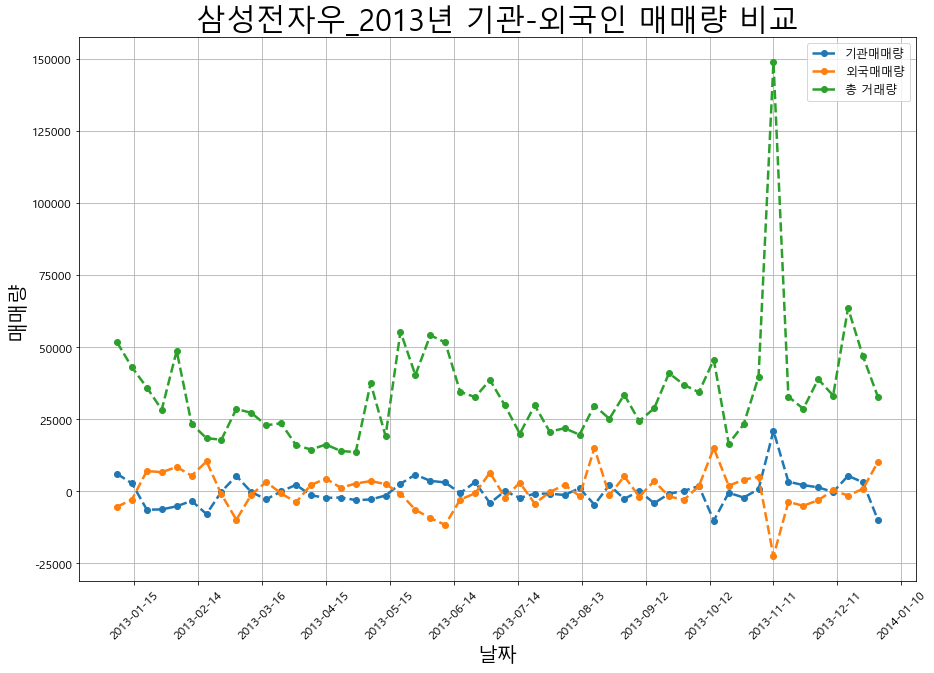

                   기관매매량         외국매매량           거래량
날짜                                                  
2014-01-06 -13148.333333  10673.333333  56383.000000
2014-01-13  -2130.400000   2522.600000  46568.000000
2014-01-20     94.600000  -1353.400000  39997.600000
2014-01-27   3193.200000  -2148.200000  35345.200000
2014-02-03   8633.333333  -9062.000000  50571.666667
...                  ...           ...           ...
2014-12-08      8.000000  -1398.000000  26178.000000
2014-12-15  13443.400000 -22975.400000  53550.200000
2014-12-22   6003.200000  -9596.000000  35748.200000
2014-12-29   3010.000000 -12205.500000  24523.000000
2015-01-05   4995.000000  -9640.000000  24005.000000

[53 rows x 3 columns]


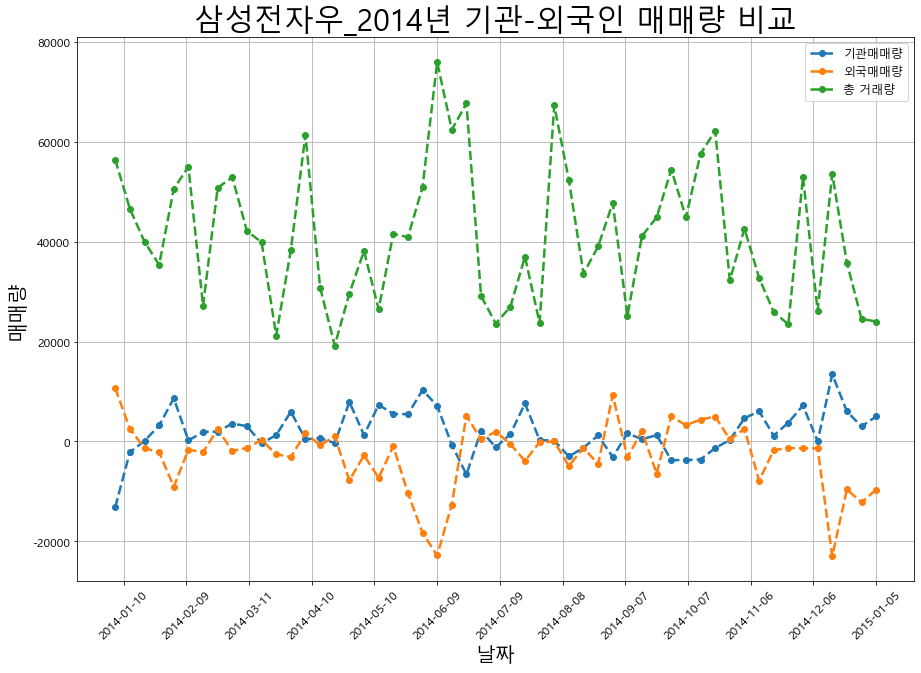

             기관매매량    외국매매량       거래량
날짜                                   
2015-01-05  4070.5  -9415.0  17588.00
2015-01-12  -715.4  -2559.2  32546.60
2015-01-19 -1091.0  -4558.6  35531.40
2015-01-26  3019.0  -5469.4  34686.40
2015-02-02  1058.4    230.8  25117.80
...            ...      ...       ...
2015-12-07 -3428.6 -26143.2  62298.60
2015-12-14  2406.0 -32881.4  60418.40
2015-12-21 -1211.4 -19286.4  49560.60
2015-12-28 -3149.0  -9471.0  38163.25
2016-01-04 -7776.5 -17021.5  47887.00

[53 rows x 3 columns]


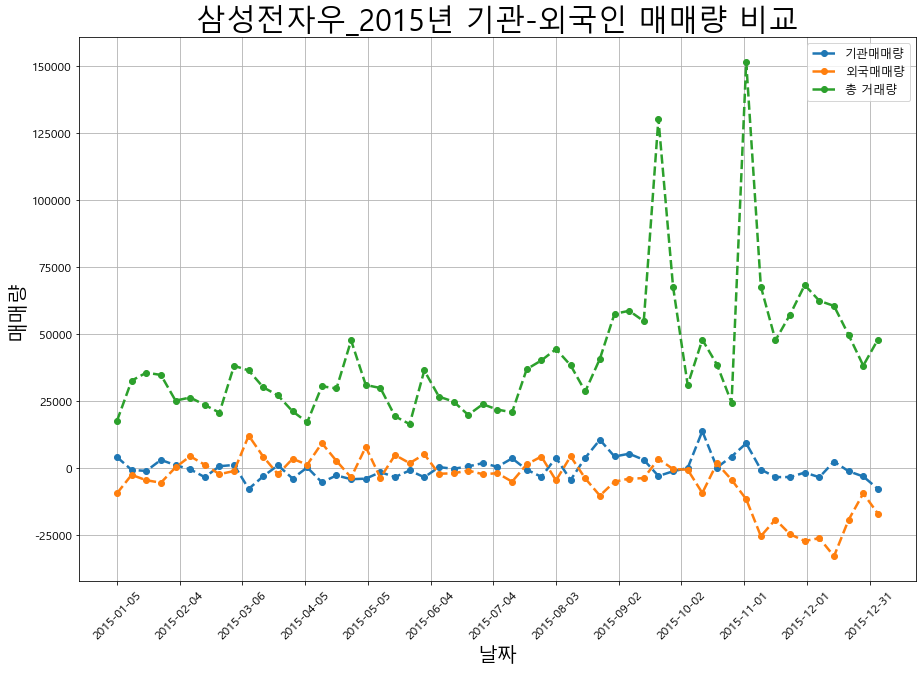

                   기관매매량        외국매매량           거래량
날짜                                                 
2016-01-04 -17418.000000 -6284.000000  54943.000000
2016-01-11  -9644.800000 -8844.400000  57120.800000
2016-01-18    651.000000 -6038.600000  44481.000000
2016-01-25   4621.000000 -4639.600000  43411.000000
2016-02-01  -7938.600000  4409.200000  50469.400000
...                  ...          ...           ...
2016-12-05   2506.200000  -410.800000  59952.000000
2016-12-12   3721.000000 -6415.600000  41576.600000
2016-12-19   -518.400000  1870.000000  36997.400000
2016-12-26   3337.600000 -4863.800000  22531.200000
2017-01-02   1917.333333  -815.333333  15374.666667

[53 rows x 3 columns]


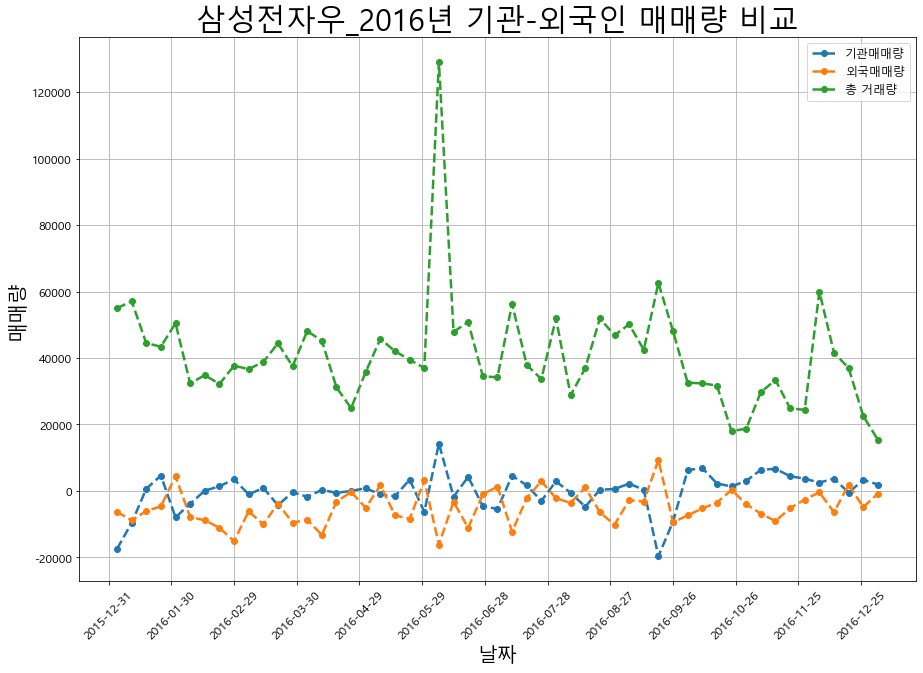

                  기관매매량        외국매매량            거래량
날짜                                                 
2017-01-02  1524.000000  -152.000000   10822.000000
2017-01-09  -382.600000  -790.600000   34026.200000
2017-01-16 -1408.800000   -34.800000   39068.200000
2017-01-23  1540.800000 -3096.000000   24040.400000
2017-01-30 -1002.333333 -1363.333333  562566.000000
...                 ...          ...            ...
2017-12-04 -5804.800000 -3075.800000   59355.200000
2017-12-11  5143.800000 -7335.400000   37673.600000
2017-12-18  4060.800000 -7446.800000   33734.000000
2017-12-25  2255.750000 -2899.000000   34259.250000
2018-01-01 -6846.666667  8173.666667   27551.333333

[53 rows x 3 columns]


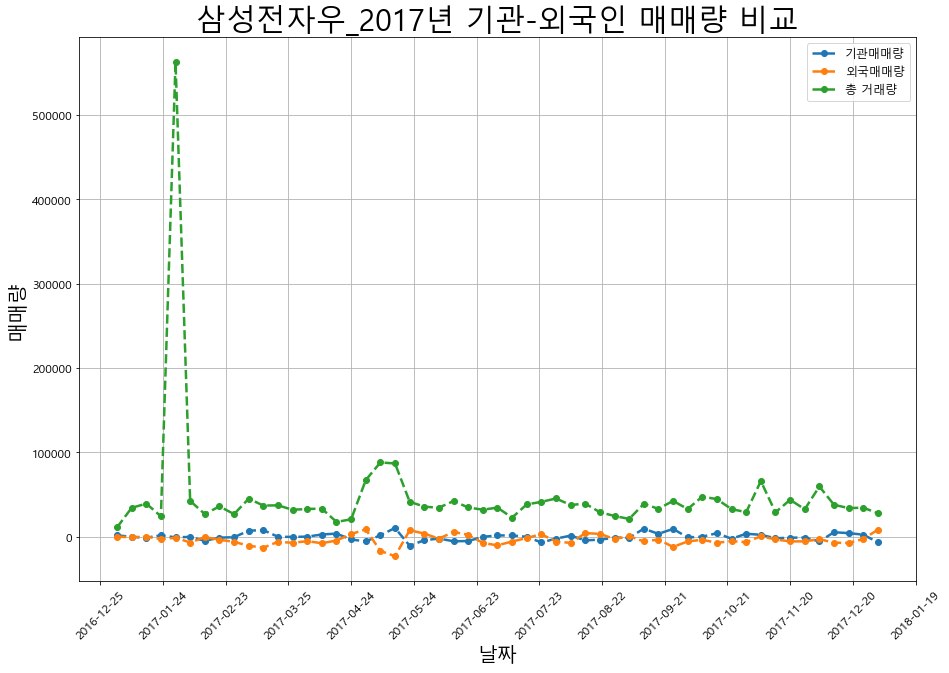

               기관매매량     외국매매량           거래량
날짜                                          
2018-01-08   -2101.4    -940.8  3.335440e+04
2018-01-15   -4185.2   -4800.4  4.540380e+04
2018-01-22   -5519.6    3425.6  3.852480e+04
2018-01-29   -2470.8    4994.8  2.982580e+04
2018-02-05   -7064.4    1864.4  5.899680e+04
...              ...       ...           ...
2018-12-03  372977.0 -432438.4  2.389287e+06
2018-12-10 -273437.2  110612.2  1.597857e+06
2018-12-17 -201202.4  174910.4  1.761459e+06
2018-12-24  118324.2 -165492.0  1.672393e+06
2018-12-31  216195.0  -26356.0  1.075377e+06

[52 rows x 3 columns]


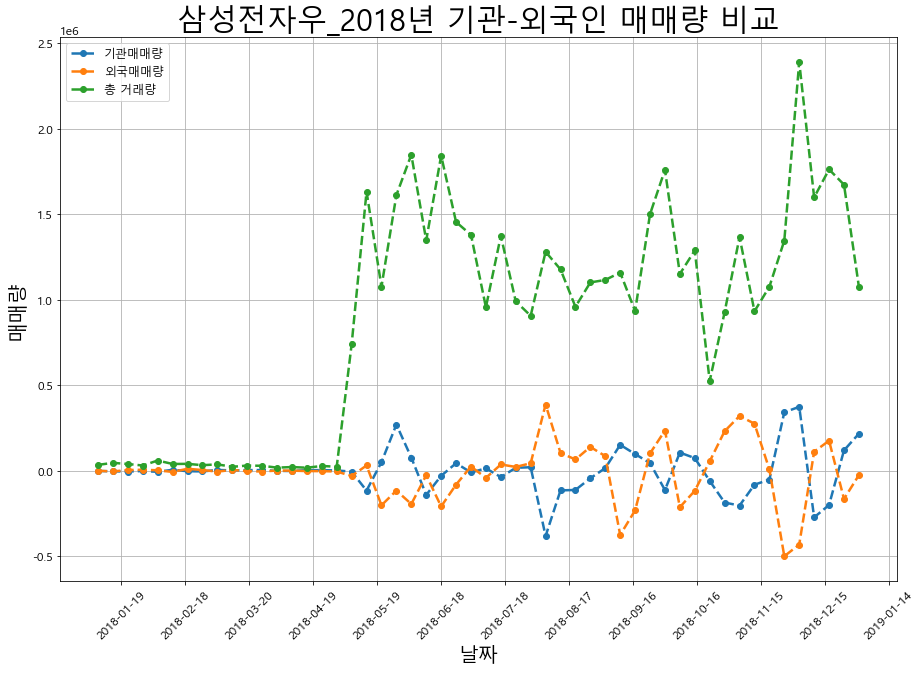

               기관매매량      외국매매량         거래량
날짜                                         
2019-01-07 -115773.5  191173.25  1085608.25
2019-01-14  136738.8  -78965.20  1536759.40
2019-01-21 -541704.6  830413.60  1858886.80
2019-01-28 -263965.4  427935.80  1641163.00
2019-02-04  306952.0 -223732.50  1878831.75
...              ...        ...         ...
2019-12-02   33448.2 -184673.40  1801031.80
2019-12-09 -248734.0  238855.80  1179393.00
2019-12-16   73259.8  170043.20  1517232.20
2019-12-23  302263.4 -488990.20  2451633.40
2019-12-30 -163338.5  -45367.75  1355273.50

[52 rows x 3 columns]


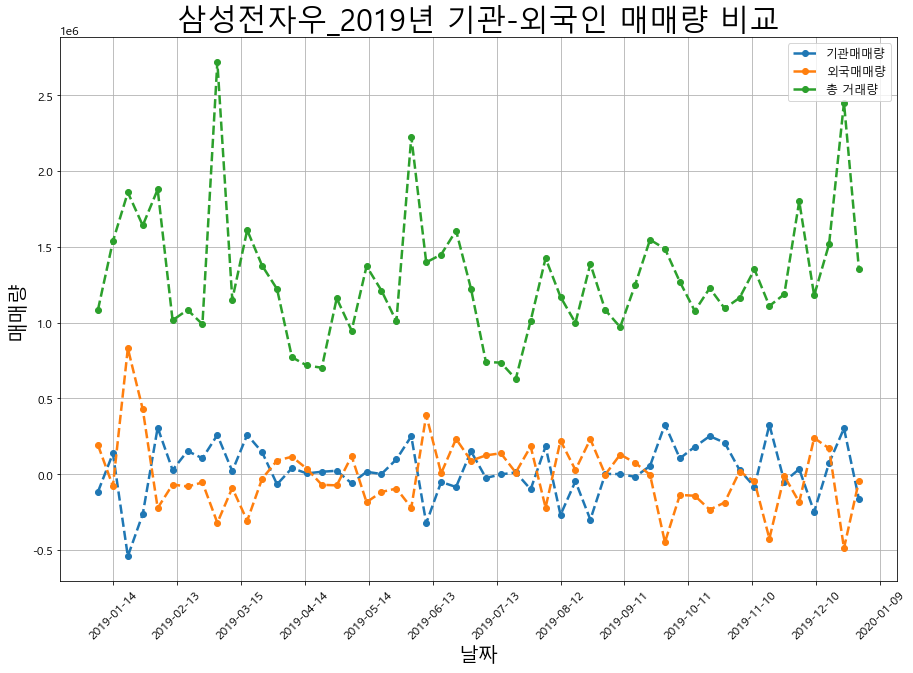

                    기관매매량         외국매매량        거래량
날짜                                                
2020-01-06 -136987.000000  1.388667e+04  1539023.0
2020-01-13  -94246.800000  1.959734e+05  2512776.8
2020-01-20 -264681.000000 -5.459540e+04  2852026.4
2020-01-27 -184807.333333 -4.750020e+05  2595469.0
2020-02-03  -65865.200000 -4.309536e+05  2653770.0
...                   ...           ...        ...
2020-12-07  -21368.800000 -1.494695e+06  4242668.8
2020-12-14 -225329.600000 -1.334900e+06  4296181.0
2020-12-21 -314720.000000 -1.386375e+06  3835233.2
2020-12-28 -687671.750000 -7.045518e+05  4697100.5
2021-01-04 -647892.500000 -3.983460e+05  4777196.0

[53 rows x 3 columns]


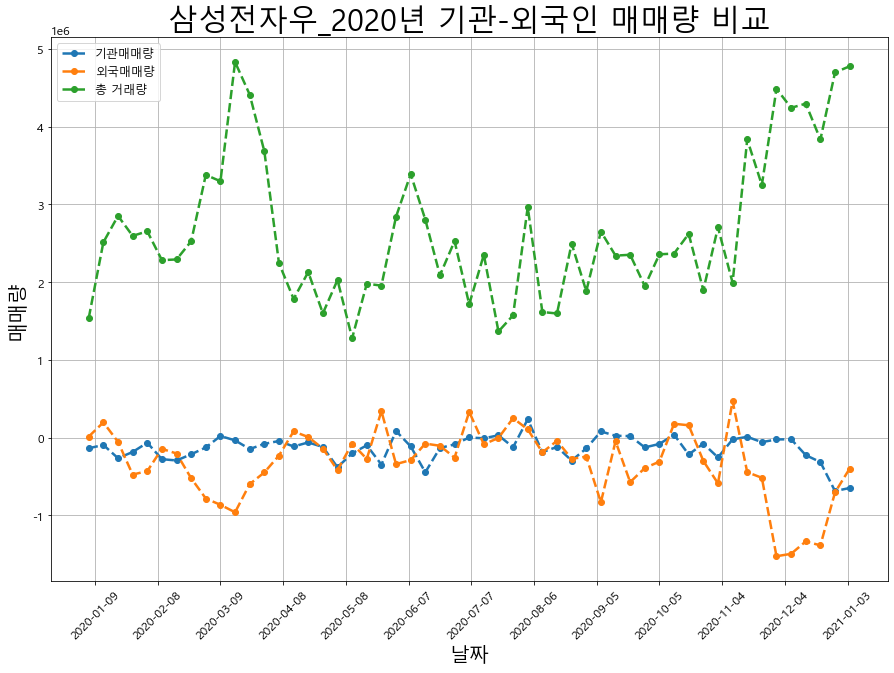

                기관매매량      외국매매량         거래량
날짜                                          
2021-01-04 -151998.00 -1827414.0  5455139.00
2021-01-11 -246119.00  -928639.2  6470371.00
2021-01-18 -147874.80 -1454437.2  5090808.60
2021-01-25  -68571.00  -527311.0  3624862.40
2021-02-01  -78853.60 -1279172.6  4106603.80
...               ...        ...         ...
2021-05-24  -26946.75  -600452.5  1458937.25
2021-05-31    1798.80  -218079.8  1421166.20
2021-06-07   23016.20   -74471.6  1174924.00
2021-06-14   -8940.40   -63532.8   856855.00
2021-06-21  -72477.20   -63977.0  1092416.80

[25 rows x 3 columns]


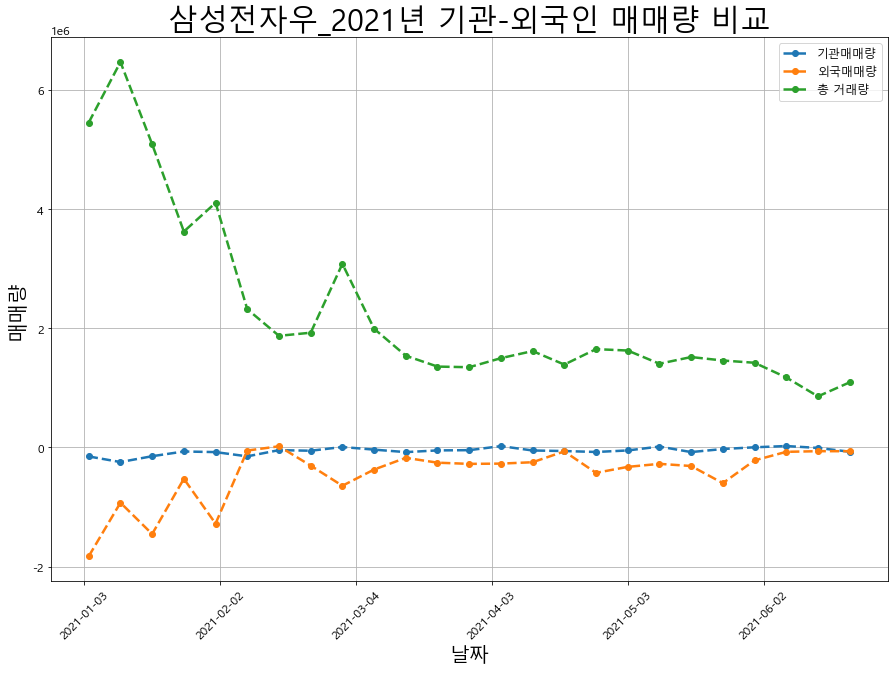

In [162]:
samsungwu = frgn_data[frgn_data.코드=='005935']
samsungwu

for year in range(2011,2022,1):
    start = f'{year}.01.01'
    end = f'{year}.12.31'
    draw_chart(samsungwu, '삼성전자우', year,start, end )

In [164]:
samsungwu[::-1]['2018.01.01':'2018.04.20']

코드         날짜         종가     전일대비   증가율      거래량   기관매매량  \
날짜                                                                         
2018-01-02  005935 2018-01-02  2097000.0   7000.0  0.33  21940.0 -2380.0   
2018-01-03  005935 2018-01-03  2090000.0   7000.0 -0.33  28417.0  2179.0   
2018-01-04  005935 2018-01-04  2090000.0      0.0  0.00  40025.0 -7529.0   
2018-01-05  005935 2018-01-05  2113000.0  23000.0  1.10  28601.0  3310.0   
2018-01-08  005935 2018-01-08  2103000.0  10000.0 -0.47  47789.0 -6087.0   
...            ...        ...        ...      ...   ...      ...     ...   
2018-04-16  005935 2018-04-16  2060000.0  22000.0  1.08  19804.0  3849.0   
2018-04-17  005935 2018-04-17  2027000.0  33000.0 -1.60  17368.0  2777.0   
2018-04-18  005935 2018-04-18  2105000.0  78000.0  3.85  38865.0  6354.0   
2018-04-19  005935 2018-04-19  2151000.0  46000.0  2.19  43478.0  1683.0   
2018-04-20  005935 2018-04-20  2105000.0  46000.0 -2.14  19362.0  1977.0   

             외국매매량       외국보유수  외국보유율  
날짜                                     
2018-01-02 -3778.0  15021675.0  82.31  
2018-01-03 -4188.0  15021477.0  82.31  
2018-01-04  8376.0  15029853.0  82.36  
2018-01-05 -5570.0  15024283.0  82.32  
2018-01-08   456.0  15024739.0  82.33  
...            ...         ...    ...  
2018-04-16 -1640.0  14985693.0  82.92  
2018-04-17 -7414.0  14976452.0  82.87  
2018-04-18  2982.0  14994303.0  82.97  
2018-04-19  2834.0  15002343.0  83.01  
2018-04-20 -8534.0  14994674.0  82.97  

[76 rows x 10 columns]

In [165]:
samsungwu[::-1]['2018.05.01':'2018.08.20']

코드         날짜         종가    전일대비   증가율        거래량     기관매매량  \
날짜                                                                            
2018-05-02  005935 2018-05-02  2125000.0     0.0  0.00        0.0       0.0   
2018-05-03  005935 2018-05-03  2125000.0     0.0  0.00        0.0       0.0   
2018-05-04  005935 2018-05-04    41050.0  1450.0 -3.41  2214624.0  -18486.0   
2018-05-08  005935 2018-05-08    42000.0   950.0  2.31  2809669.0 -338411.0   
2018-05-09  005935 2018-05-09    40550.0  1450.0 -3.45  1422660.0   75543.0   
...            ...        ...        ...     ...   ...        ...       ...   
2018-08-13  005935 2018-08-13    36700.0   300.0 -0.81   902625.0   -3441.0   
2018-08-14  005935 2018-08-14    36850.0   150.0  0.41   638309.0  -96664.0   
2018-08-16  005935 2018-08-16    35600.0  1250.0 -3.39  1374624.0  -45430.0   
2018-08-17  005935 2018-08-17    35850.0   250.0  0.70  1232567.0 -253838.0   
2018-08-20  005935 2018-08-20    36050.0   200.0  0.56   587065.0  -56649.0   

               외국매매량        외국보유수    외국보유율  
날짜                                          
2018-05-02       0.0   14975995.0    82.87  
2018-05-03       0.0  839304000.0  4644.22  
2018-05-04  -94603.0  839219523.0    92.87  
2018-05-08  483845.0  839850142.0    92.94  
2018-05-09 -427117.0  839378375.0    92.89  
...              ...          ...      ...  
2018-08-13   42838.0  761775040.0     84.3  
2018-08-14  102718.0  761877758.0    84.31  
2018-08-16 -246900.0  761643725.0    84.29  
2018-08-17  368685.0  762012410.0    84.33  
2018-08-20   35492.0  762047902.0    84.33  

[74 rows x 10 columns]